## Imports

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

Q2_JSON_FILE_NAME = "Q2_run_order.json"
Q3_JSON_FILE_NAME = "Q3_run_order.json"
Q3_GreenBoundingBox_JSON_FILE_NAME = "Q3_GreenBoundingBox.json"


Q2_run_order_dict = None
Q3_run_order_dict = None
Q3_bounding_box_run_dict = None

with open(Q2_JSON_FILE_NAME) as json_file:
    Q2_run_order_dict = json.load(json_file)

with open(Q3_JSON_FILE_NAME) as json_file:
    Q3_run_order_dict = json.load(json_file)

with open(Q3_GreenBoundingBox_JSON_FILE_NAME) as json_file:
    Q3_bounding_box_run_dict = json.load(json_file)

## Functions

In [4]:
def create_file_name_via_dict(run_order_dict):
    """
    From the json configs create multiple file names
    note that the file names are the same as we saved before in the algorithm
    the file_names correspond to just one order of runs

    Parameters:
    -----------
    run_order_dict : dictionary
        the configs for each algorithm run

    Returns:
    ---------
    file_name_arr : array_like
        the array of file names that are for an algorithm run 
    """
    file_name_arr = []
    
    selection_method_arr = run_order_dict['SELECTION_METHODS']
    recombination_arr = run_order_dict['RECOMBINATION_METHODS']
    mutation_arr = run_order_dict['MUTATION_METHODS']
    problem_size_arr = run_order_dict['PROBLEM_SIZES']
    population_size_arr = run_order_dict['POPULATION_SIZES']
    probabilities_mutation = run_order_dict['PROBABILITIES_MUTATION']
    probabilities_crossover = run_order_dict['PROBABILITIES_CROSSOVER']
    fitness_function_arr = run_order_dict['FITNESS_FUNCTIONS']

    ## the `T` value for fourpeaks and sixpeaks functions 
    T = None
    if 'T' not in run_order_dict.keys():
        T = None
    else:
        T = run_order_dict['T']

    for selection_method in selection_method_arr:
        for recombination_method in recombination_arr:
            for mutation_method in mutation_arr:
                for population_size in population_size_arr:
                    for problem_size in problem_size_arr:
                        for probability_mutation in probabilities_mutation:
                            for probability_cross_over in probabilities_crossover:
                                for fitness_function in fitness_function_arr:
                                    run_orders_dict = {}
                                    for algorithm_run in range(10):
                                        file_name = None
                                        if T is None:
                                            file_name = f'Resutls_fitness-function={fitness_function}_Pc={probability_cross_over}_Pm={probability_mutation}_PopSize={population_size}_ProblemSize={problem_size}_selection-method={selection_method}_recombination-method={recombination_method}_mutation-method={mutation_method}_algorithm_run={algorithm_run}.csv'
                                        else:
                                            file_name = f'Resutls_fitness-function={fitness_function}_Pc={probability_cross_over}_Pm={probability_mutation}_PopSize={population_size}_ProblemSize={problem_size}_selection-method={selection_method}_recombination-method={recombination_method}_mutation-method={mutation_method}_T={T}_algorithm_run={algorithm_run}.csv'

                                        run_orders_dict[f'{algorithm_run}'] = file_name
                                        
                                    file_name_arr.append(run_orders_dict)
    
    return file_name_arr

def extract_file_contents(csv_file):
    """
    extract the contents of each csv file with pandas library
    
    """

    info_dict = {}
    try :
        df = pd.read_csv(csv_file)
        info_dict['min_fitness'] = df[' min_fitness'].values
        info_dict['max_fitness'] = df[' max_fitness'].values
        info_dict['mean_fitness'] = df[' mean_fitness'].values
        info_dict['median_fitness'] = df[' median_fitness'].values
        info_dict['quarter_fitness'] = df[' quarter_fitness'].values
        info_dict['three_quarter_fitness'] = df[' three_quarter_fitness'].values
        info_dict['standard_deviation'] = df[' standard_deviation'].values

        return info_dict

    except OSError as e:
        print(f'Warning: {e}')
        return None


def info_runs_value(file_names, extract_info = 'mean_fitness', file_directory='Results\\'):
    """
    the information we want to extract from each algorithm run

    Parameters:
    ------------
    file_names : dictionary
        a dictionary of 


    Return:
    --------
    info_arr : array_like
        all the extracted information in an array
    """

    info_arr = []
    for file in file_names:
        m_info_dict = extract_file_contents(file_directory + file)
        info_arr.append(list(m_info_dict[extract_info]))
    
    return info_arr

def extract_info_file_name(file_name):
    """
    extract the information of the algorithm run from file name
    """
    fitness_function = 'fitness-function'
    ## probabilities for mutation and cross over
    pc = "Pc"
    pm = "Pm"
    pop_size = 'PopSize' 
    problem_size = 'ProblemSize'
    recombination = 'recombination-method'
    selection = 'selection-method'
    mutation = 'mutation-method'

    ## the start of each name
    attributes = file_name.split('_')

    ## the index for each name is static
    fitness_function_name = attributes[1][len(fitness_function) + 1:]
    probability_crossover = attributes[2][len(pc)+1:]
    probability_mutation = attributes[3][len(pm) +1:]
    pop_size_value = attributes[4][len(pop_size)+1:]
    problem_size_value = attributes[5][len(problem_size)+1:]
    selection_method = attributes[6][len(selection)+1:] + '-' + attributes[7]
    recombination_method = attributes[8][len(recombination)+1: ] + '-' + attributes[9]
    mutation_method = attributes[10][len(mutation)+1:] + '-' + attributes[11]

def plot_all_arrays(value_arr, additional_text=''):
    """
    plot all the values representing the array 
    """
    plt.figure(figsize=(8, 6))
    for idx, values in enumerate(value_arr):
        plt.plot(values, label=f'run {idx}')

    print(additional_text)
    plt.legend()

def get_max_value(value_data):
    max_values = []
    for values in value_data:
        if values != []:
            max_values.append( max(values) )
    
    return max_values

def statistics_of_max_values(fitness_arr):
    """
    get the statistics of 10 algorithm run
    max fitness values in generations of each run
    """
    ## the array of maximum values for each run
    generations_max_fitness_arr = get_max_value(fitness_arr)

    ## extracting the statistics
    std = np.std(generations_max_fitness_arr)
    mean = np.mean(generations_max_fitness_arr)
    min = np.mean(generations_max_fitness_arr)
    max = np.max(generations_max_fitness_arr)

    return std, mean, min, max

def get_all_statistics(run_order_dict, by='max_fitness'):
    """
    Get all the statistics of the run of the algorithm
    Merge the 10 run of each algorithm

    Parameters:
    ------------
    run_order_dict : dictionary
        dictionary of all the configs related to run of the algorithm in past
    by : string
        merge values of the fitnesses in each generation
    
    Return:
    ---------
    table3_row_run : dictionary
        the dictionary correspond to the run of the algorithm
    """
    table3_row_run = {}
    ## for each row of the table given in the question
    for run_order in run_order_dict.keys():
        order_file_names_dict = create_file_name_via_dict(run_order_dict[run_order])

        ## for all the configs of each run
        run_configs = {}    

        ## for each run of one the configs the row have
        ## by configs we mean the hyperparameters of the algorithm 
        for run_round in order_file_names_dict:
            order1_max_arr = info_runs_value(run_round.values(), by)
            Std, Mean, Min, Max = statistics_of_max_values(order1_max_arr)

            ## the statistics for all the 10 run of the algorithm
            run_configs[run_round['0'][8:-20]] = {'std': Std, 'mean': Mean, 'min': Min, 'max': Max}
            # plt.scatter()
        table3_row_run[run_order] = run_configs
    
    return table3_row_run

def find_first_diff(string1, string2):
    """
    return the index of the first difference
    """
    for idx in range(len(string1)):
        if string1[idx] != string2[idx]:
            break
    
    return idx - 1
def find_config_differnces(config_arr, config2_arr):
    """
    return the first elements that are different in arrays, else return None
    """
    for idx in range(len(config_arr)):
        if config_arr[idx] != config2_arr[idx]:
            return config_arr[idx]
    
    return None

def plot_results(table_order_run, fitness_function_name, stats='max'):
    """
    plot the result of one algorithm runs
    this belong to one row of the table

    Parameters:
    ------------
    table_order_run : dictionary
        the statistics belong to the algorithm 10 run, {mean, min, max}
    fitness_function_name : string
        the fitness function results to show
    stats : string
        how to merge the 10 run of each algorithm, can be `mean`, `min`, or `max`
        default is `max`
    """
    if (stats != 'max') and (stats != 'min') and (stats != 'mean'):
        raise ValueError(f"stats variable should be either `max`, `min` or `mean`, the input stats is:{stats}")

    idx = 0
    information = []
    for key in table_order_run.keys():
        if key.count(fitness_function_name) != 0: 
            ## add the name of each algorithm runs
            information.append(key)
            # plt.scatter(idx, table_order_run[key]['max'])
            plt.errorbar(idx, table_order_run[key][stats], table_order_run[key]['std'], marker='^')
            idx += 1

    difference = find_config_differnces(information[0].split('_'), information[1].split('_'))
    difference_idx = information[0].split('_').index(difference)

    plot_labels = []
    for i in range(len(information)):
        plot_labels.append(information[i].split('_')[difference_idx])

    plot_title = ''
    for idx, info in enumerate(information[0].split('_')):
        if idx != difference_idx:
            plot_title += f'_{info}'

    plt.title(plot_title)
    plt.legend(plot_labels)


## Showing Q2 table run, results

In [3]:
table2_row_run = get_all_statistics(Q2_run_order_dict)


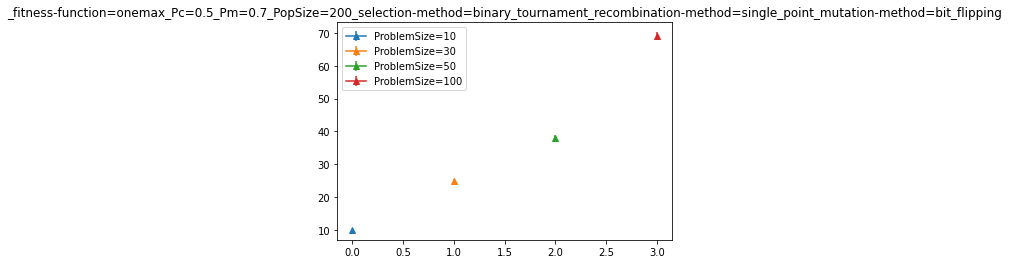

In [4]:
plot_results(table2_row_run['order_1'], fitness_function_name='onemax')

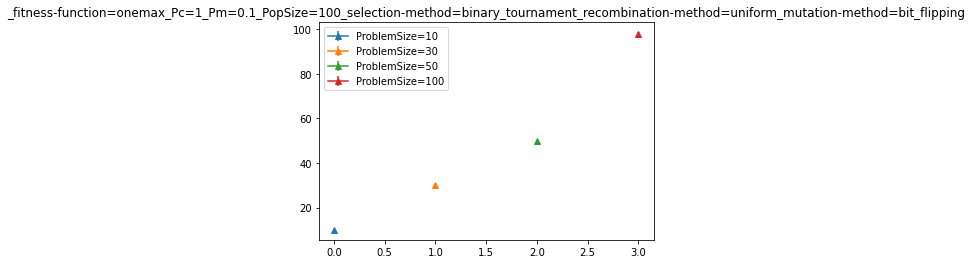

In [5]:
plot_results(table2_row_run['order_2'], fitness_function_name='onemax')

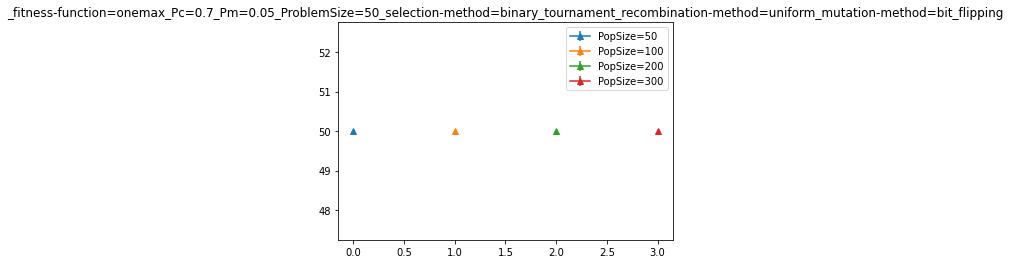

In [6]:
plot_results(table2_row_run['order_3'], fitness_function_name='onemax')


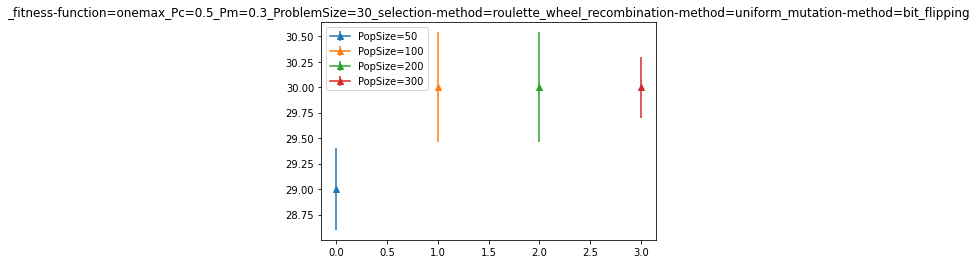

In [7]:
plot_results(table2_row_run['order_4'], fitness_function_name='onemax')

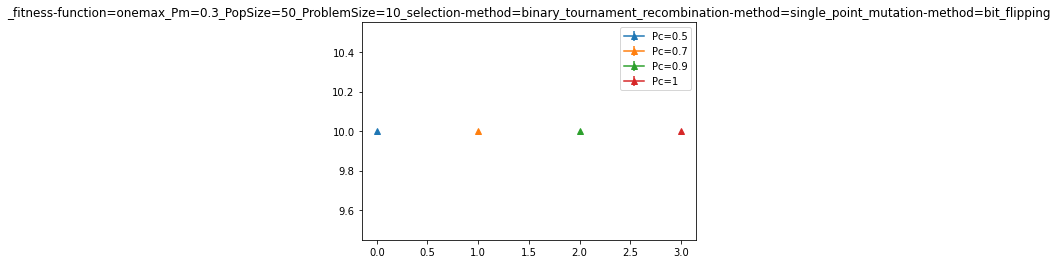

In [8]:
plot_results(table2_row_run['order_5'], fitness_function_name='onemax')

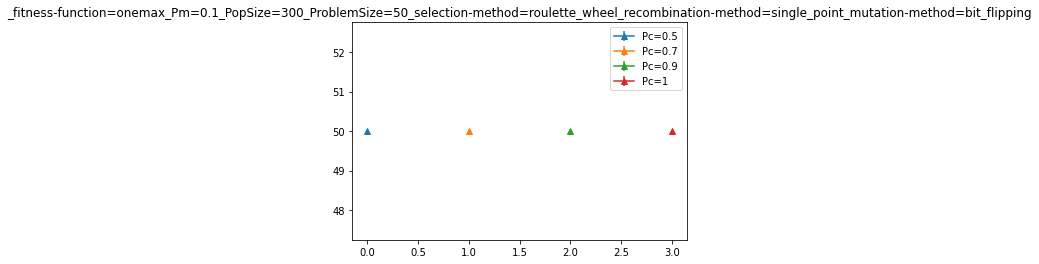

In [9]:
plot_results(table2_row_run['order_6'], fitness_function_name='onemax')

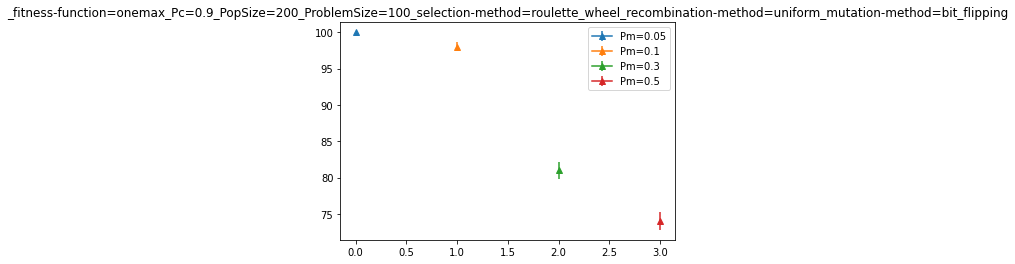

In [10]:
plot_results(table2_row_run['order_7'], fitness_function_name='onemax')

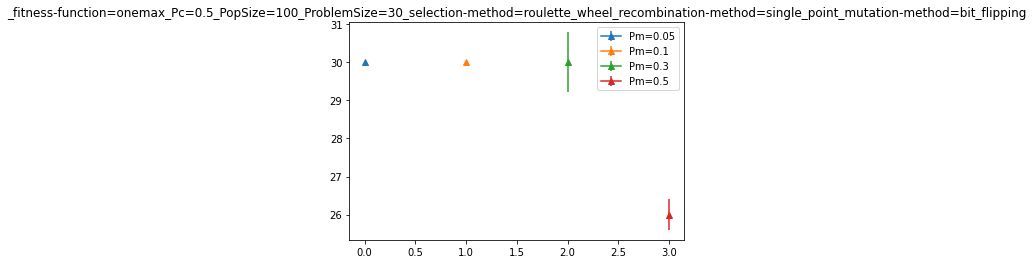

In [11]:
plot_results(table2_row_run['order_8'], fitness_function_name='onemax')


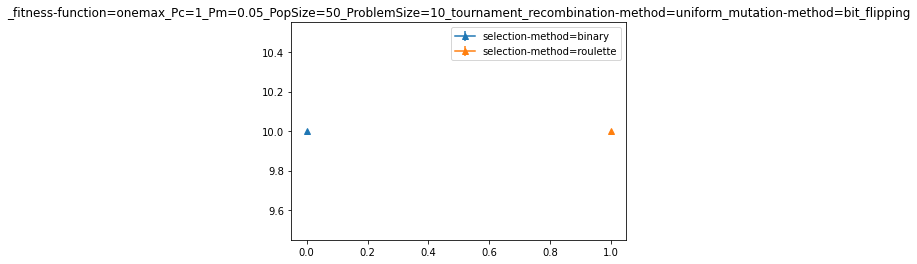

In [12]:
plot_results(table2_row_run['order_9'], fitness_function_name='onemax')


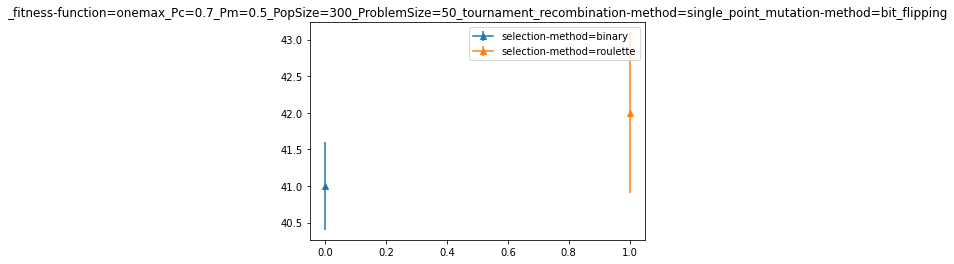

In [13]:
plot_results(table2_row_run['order_10'], fitness_function_name='onemax')

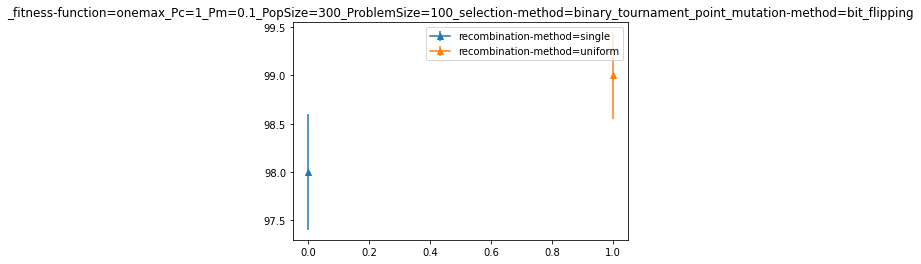

In [14]:
plot_results(table2_row_run['order_11'], fitness_function_name='onemax')

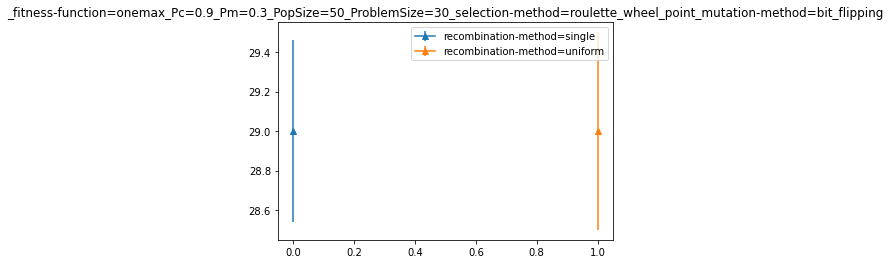

In [15]:
plot_results(table2_row_run['order_12'], fitness_function_name='onemax')

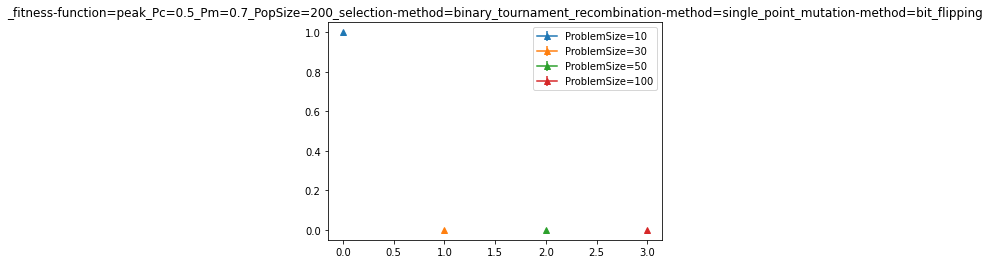

In [16]:
plot_results(table2_row_run['order_1'], fitness_function_name='fitness-function=peak')

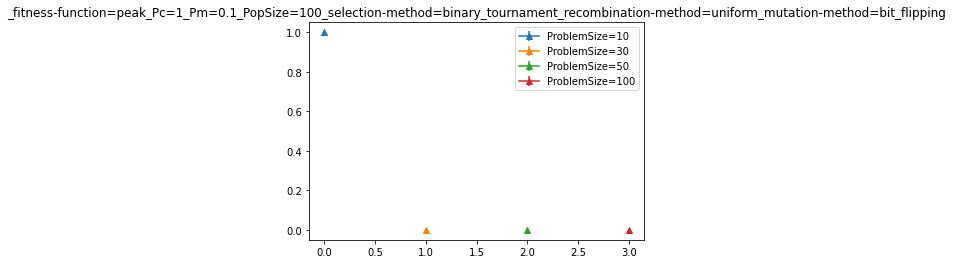

In [17]:
plot_results(table2_row_run['order_2'], fitness_function_name='fitness-function=peak')


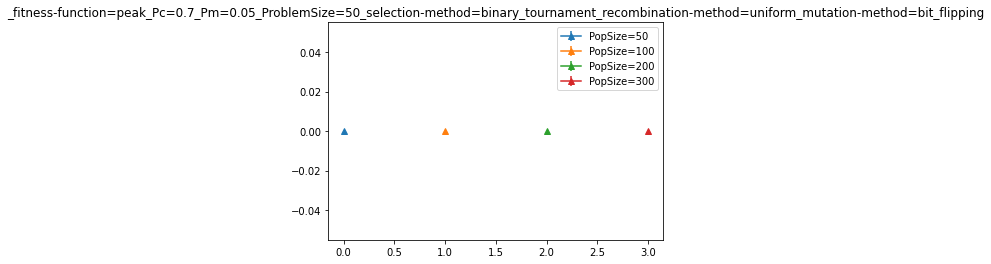

In [18]:
plot_results(table2_row_run['order_3'], fitness_function_name='fitness-function=peak')

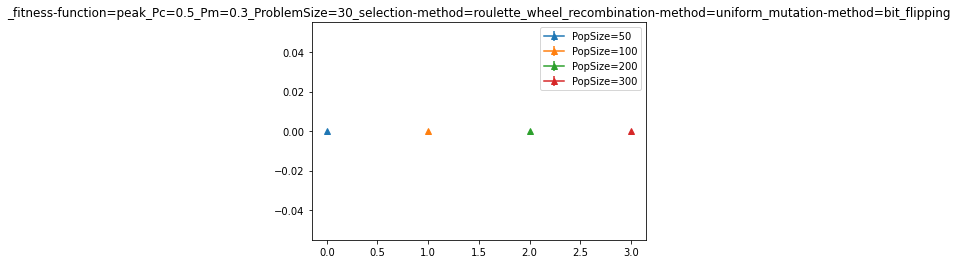

In [19]:
plot_results(table2_row_run['order_4'], fitness_function_name='fitness-function=peak')


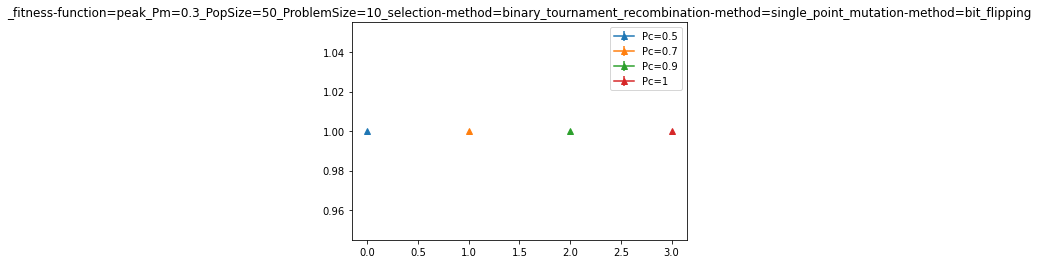

In [20]:
plot_results(table2_row_run['order_5'], fitness_function_name='fitness-function=peak')


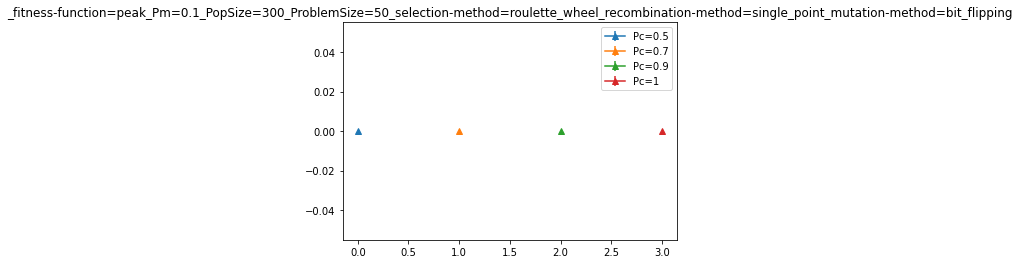

In [21]:
plot_results(table2_row_run['order_6'], fitness_function_name='fitness-function=peak')


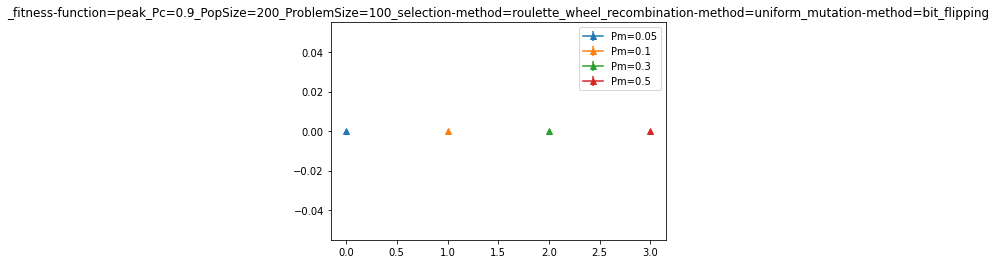

In [22]:
plot_results(table2_row_run['order_7'], fitness_function_name='fitness-function=peak')


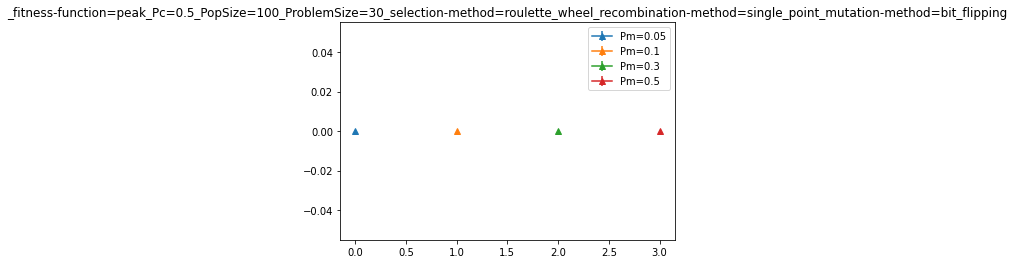

In [23]:
plot_results(table2_row_run['order_8'], fitness_function_name='fitness-function=peak')


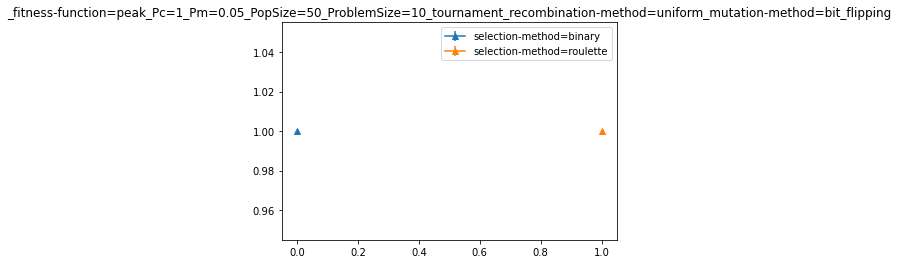

In [24]:
plot_results(table2_row_run['order_9'], fitness_function_name='fitness-function=peak')


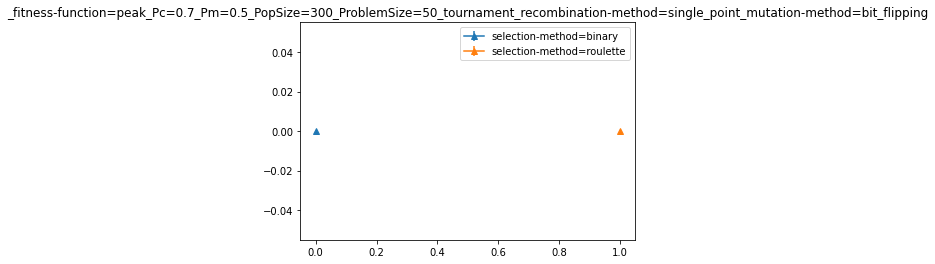

In [25]:
plot_results(table2_row_run['order_10'], fitness_function_name='fitness-function=peak')


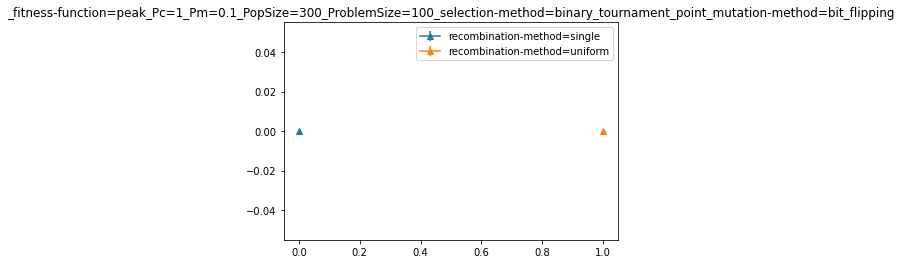

In [26]:
plot_results(table2_row_run['order_11'], fitness_function_name='fitness-function=peak')


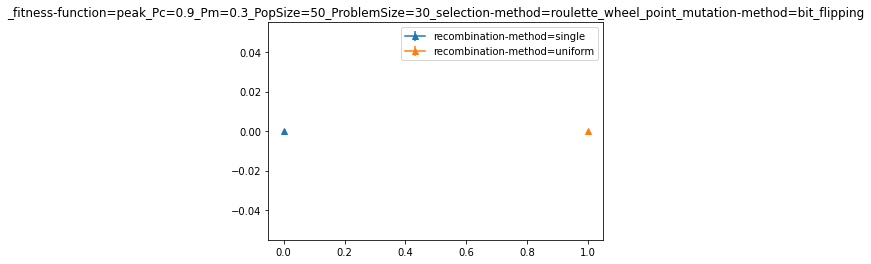

In [27]:
plot_results(table2_row_run['order_12'], fitness_function_name='fitness-function=peak')


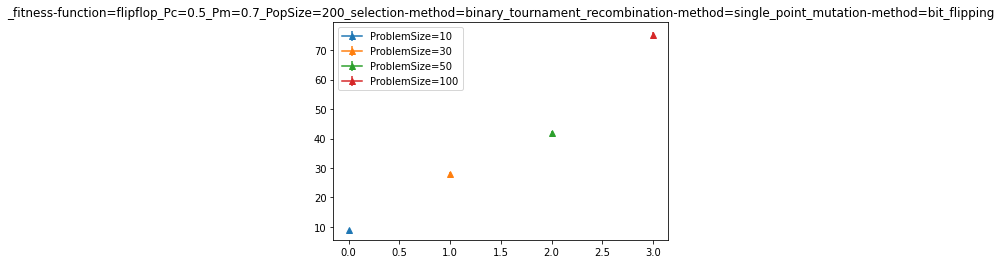

In [28]:
plot_results(table2_row_run['order_1'], fitness_function_name='flipflop')


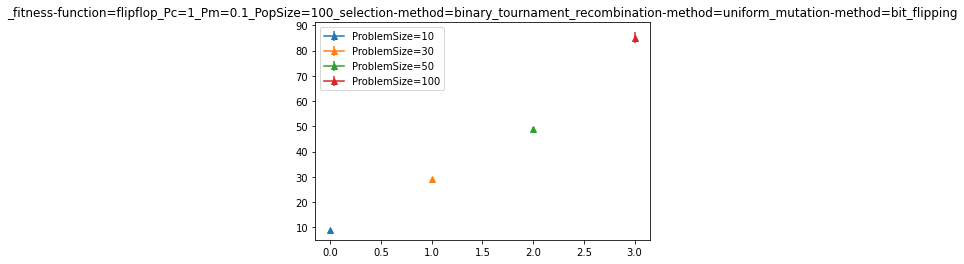

In [29]:
plot_results(table2_row_run['order_2'], fitness_function_name='flipflop')


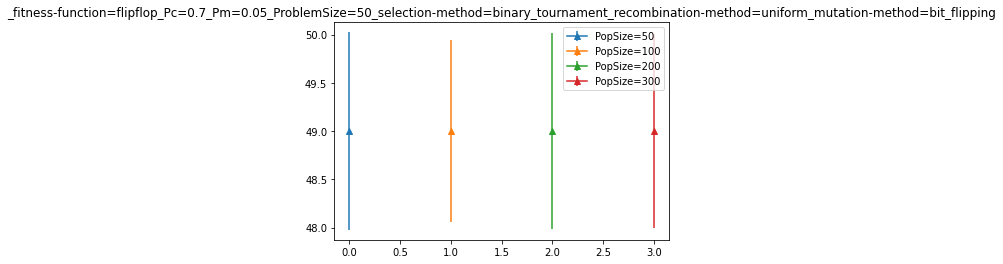

In [30]:
plot_results(table2_row_run['order_3'], fitness_function_name='flipflop')


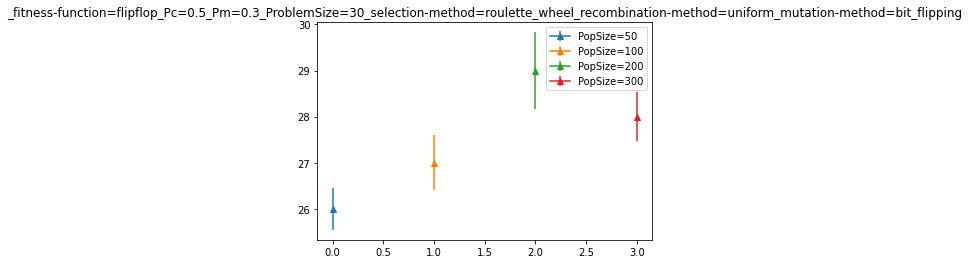

In [31]:
plot_results(table2_row_run['order_4'], fitness_function_name='flipflop')


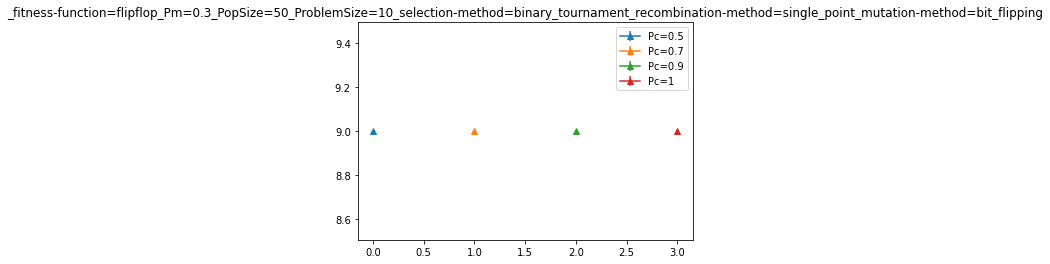

In [32]:
plot_results(table2_row_run['order_5'], fitness_function_name='flipflop')


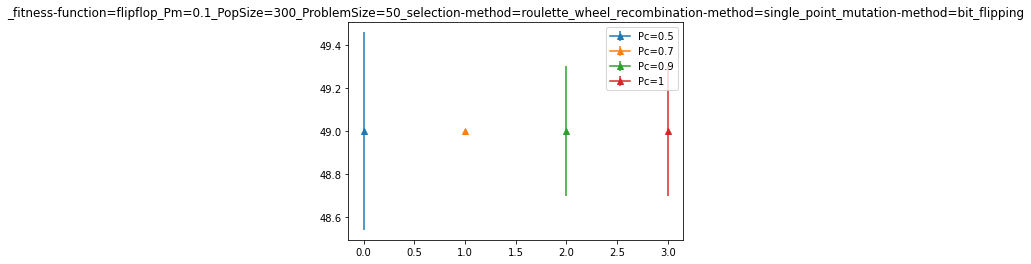

In [33]:
plot_results(table2_row_run['order_6'], fitness_function_name='flipflop')


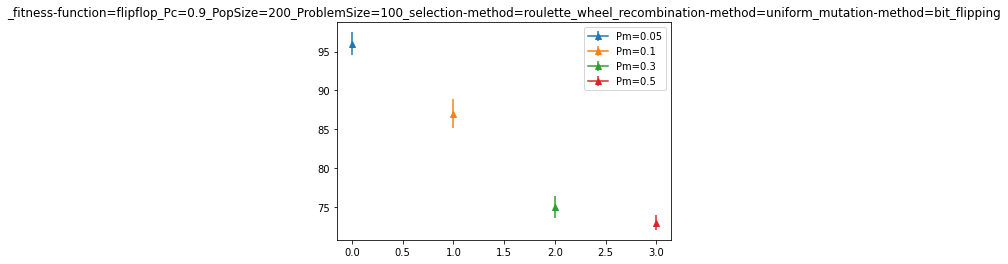

In [34]:
plot_results(table2_row_run['order_7'], fitness_function_name='flipflop')


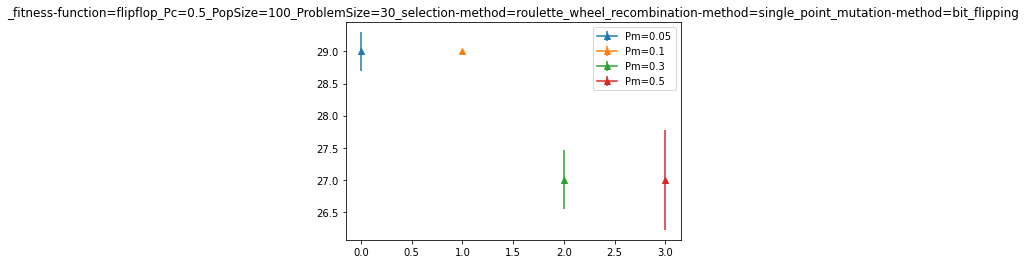

In [35]:
plot_results(table2_row_run['order_8'], fitness_function_name='flipflop')


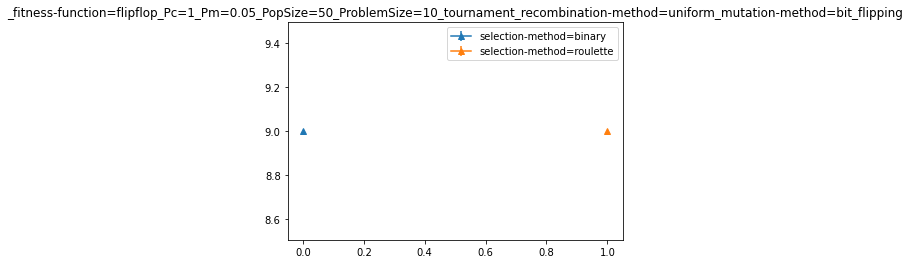

In [36]:
plot_results(table2_row_run['order_9'], fitness_function_name='flipflop')


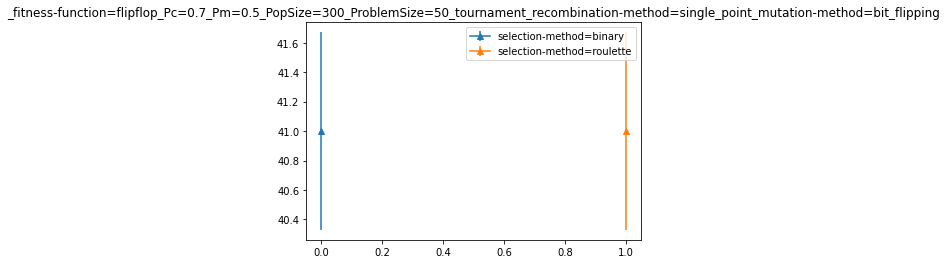

In [37]:
plot_results(table2_row_run['order_10'], fitness_function_name='flipflop')


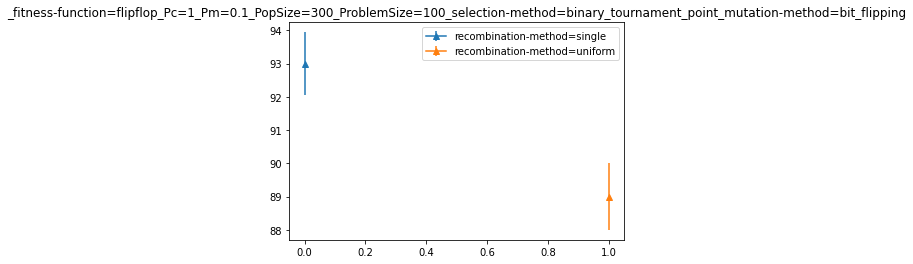

In [38]:
plot_results(table2_row_run['order_11'], fitness_function_name='flipflop')


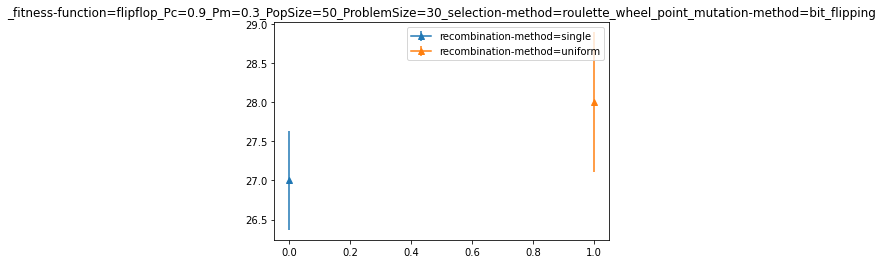

In [39]:
plot_results(table2_row_run['order_12'], fitness_function_name='flipflop')


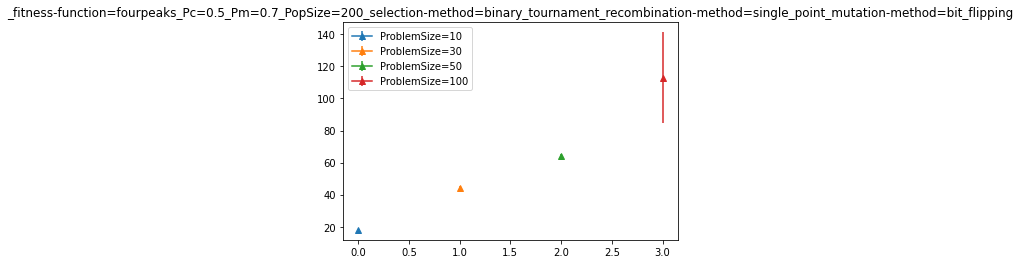

In [40]:
plot_results(table2_row_run['order_1'], fitness_function_name='fourpeaks')


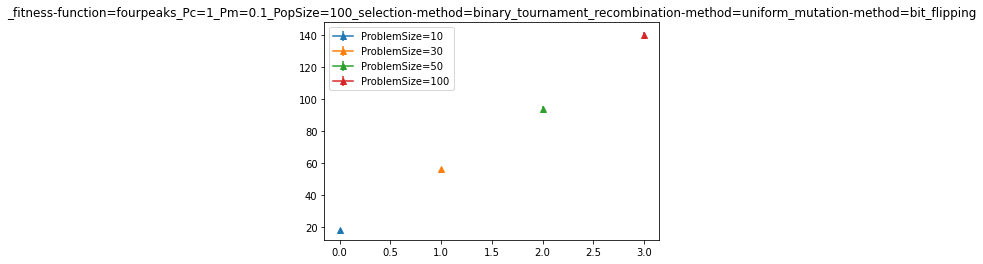

In [41]:
plot_results(table2_row_run['order_2'], fitness_function_name='fourpeaks')


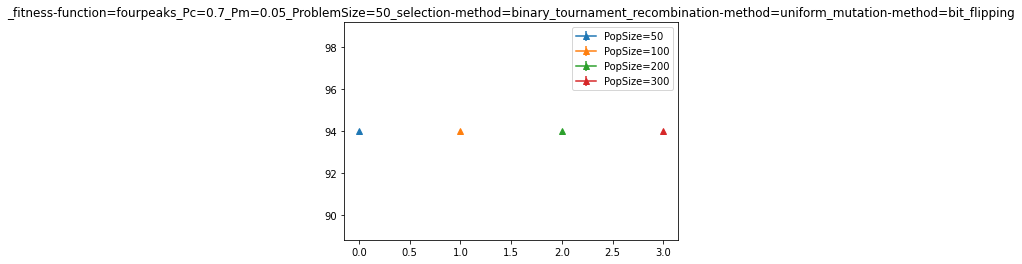

In [42]:
plot_results(table2_row_run['order_3'], fitness_function_name='fourpeaks')


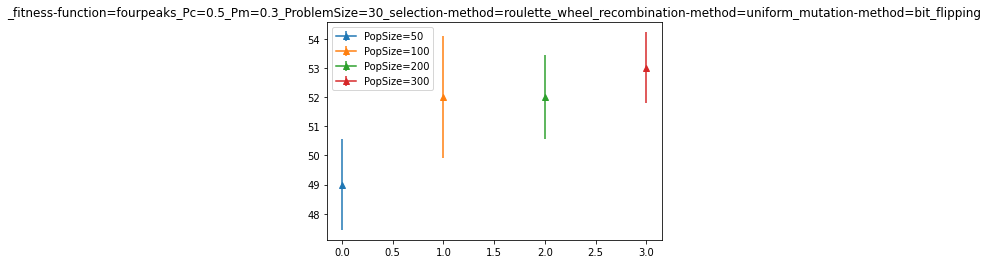

In [43]:
plot_results(table2_row_run['order_4'], fitness_function_name='fourpeaks')


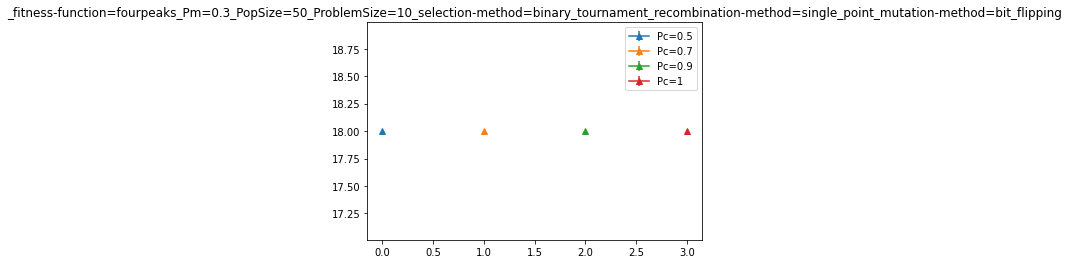

In [44]:
plot_results(table2_row_run['order_5'], fitness_function_name='fourpeaks')


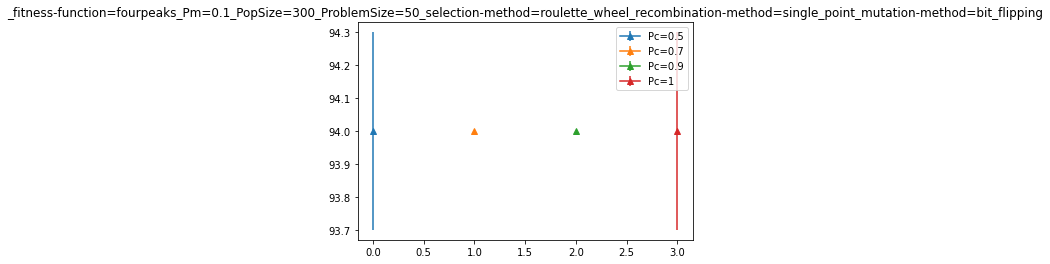

In [45]:
plot_results(table2_row_run['order_6'], fitness_function_name='fourpeaks')


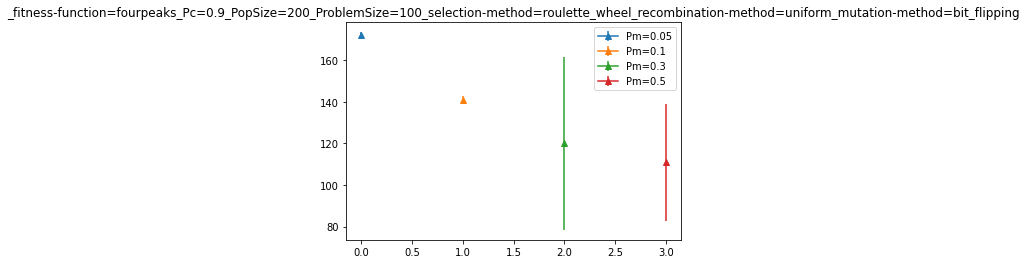

In [46]:
plot_results(table2_row_run['order_7'], fitness_function_name='fourpeaks')


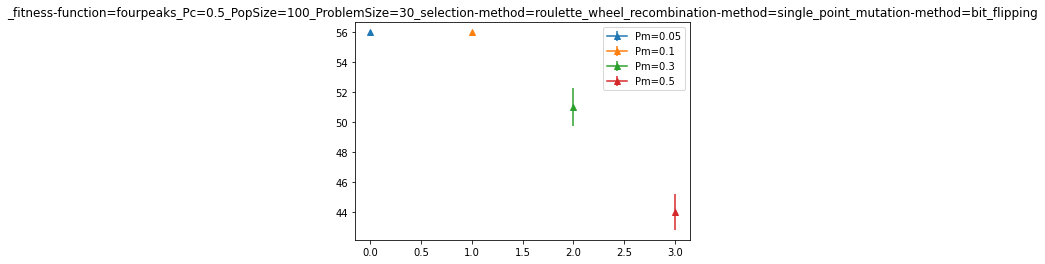

In [47]:
plot_results(table2_row_run['order_8'], fitness_function_name='fourpeaks')


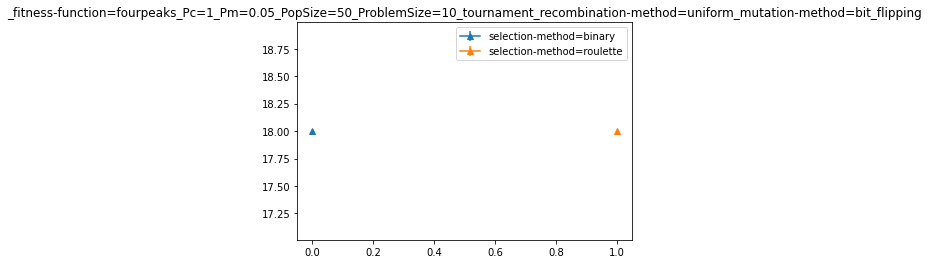

In [48]:
plot_results(table2_row_run['order_9'], fitness_function_name='fourpeaks')


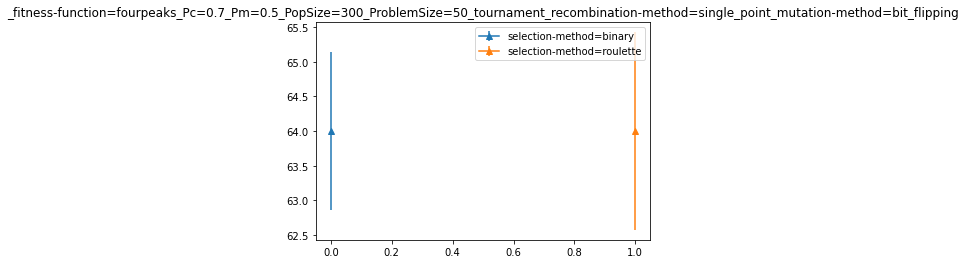

In [49]:
plot_results(table2_row_run['order_10'], fitness_function_name='fourpeaks')


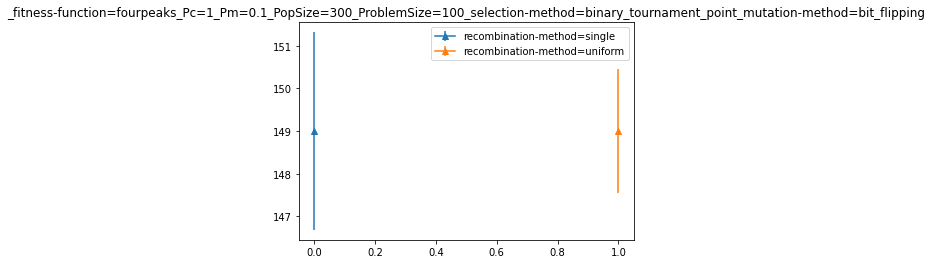

In [50]:
plot_results(table2_row_run['order_11'], fitness_function_name='fourpeaks')


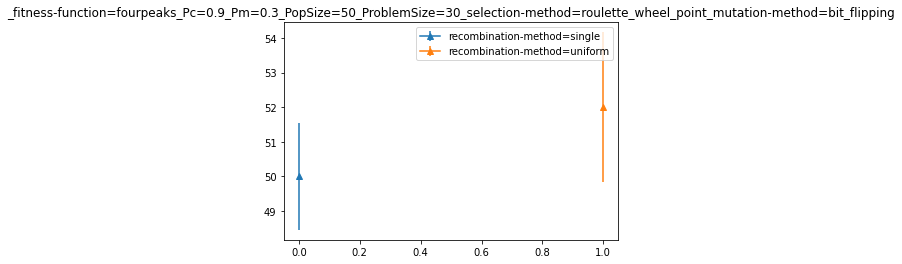

In [51]:
plot_results(table2_row_run['order_12'], fitness_function_name='fourpeaks')


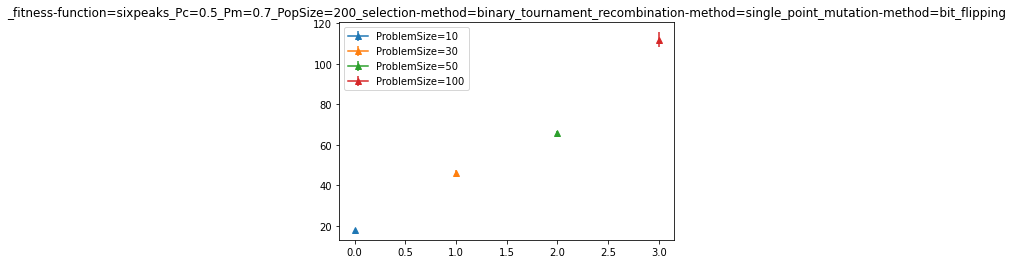

In [52]:
plot_results(table2_row_run['order_1'], fitness_function_name='sixpeaks')


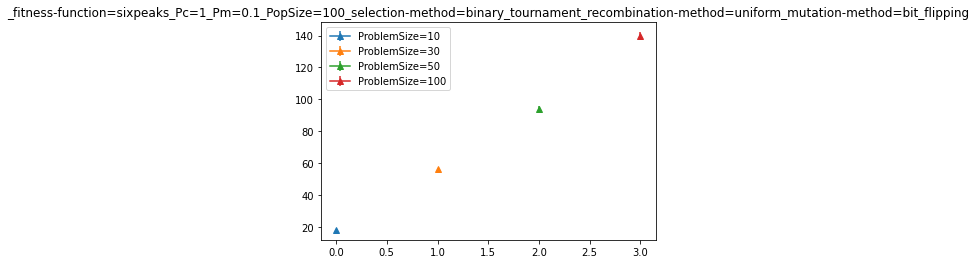

In [53]:
plot_results(table2_row_run['order_2'], fitness_function_name='sixpeaks')


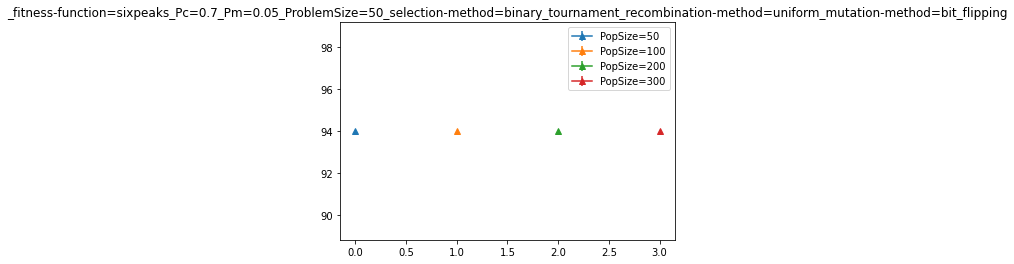

In [54]:
plot_results(table2_row_run['order_3'], fitness_function_name='sixpeaks')


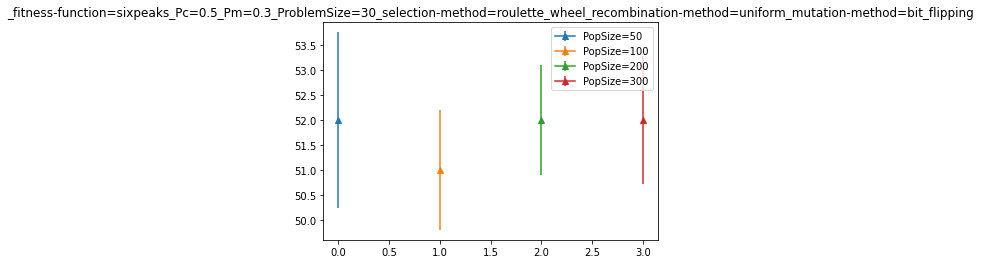

In [55]:
plot_results(table2_row_run['order_4'], fitness_function_name='sixpeaks')


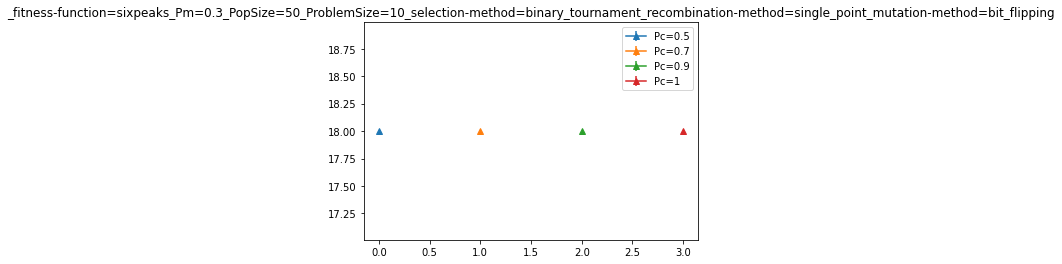

In [56]:
plot_results(table2_row_run['order_5'], fitness_function_name='sixpeaks')


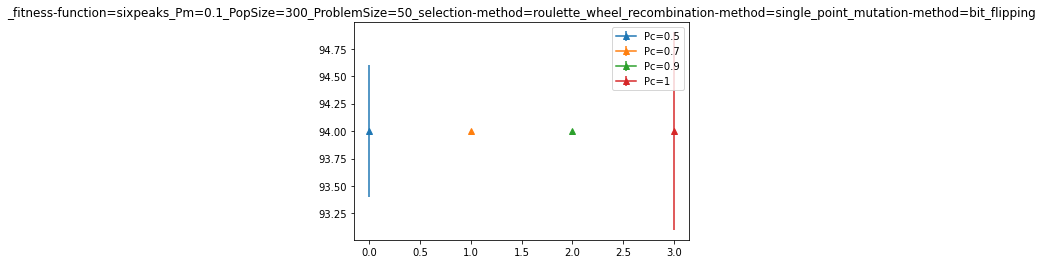

In [57]:
plot_results(table2_row_run['order_6'], fitness_function_name='sixpeaks')


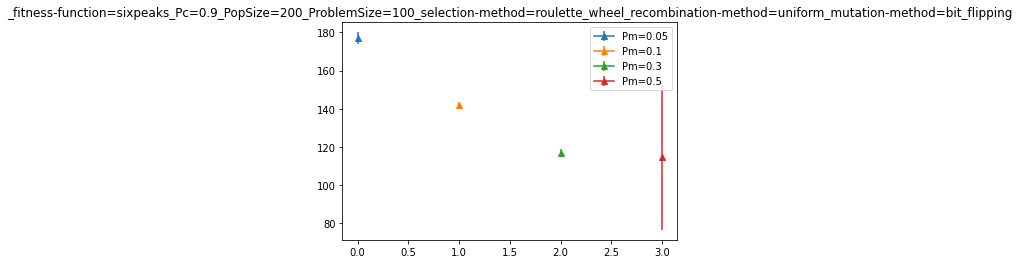

In [58]:
plot_results(table2_row_run['order_7'], fitness_function_name='sixpeaks')


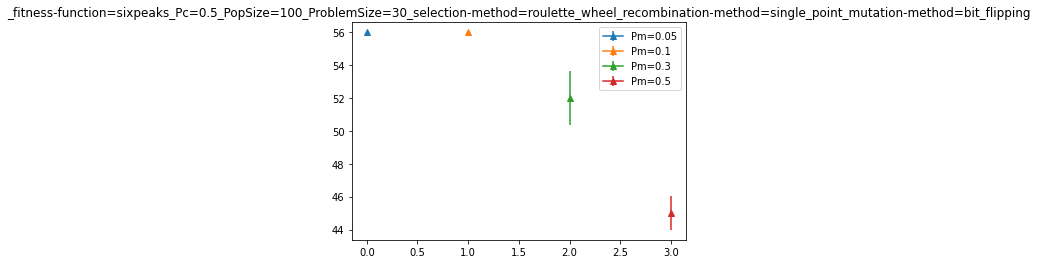

In [59]:
plot_results(table2_row_run['order_8'], fitness_function_name='sixpeaks')


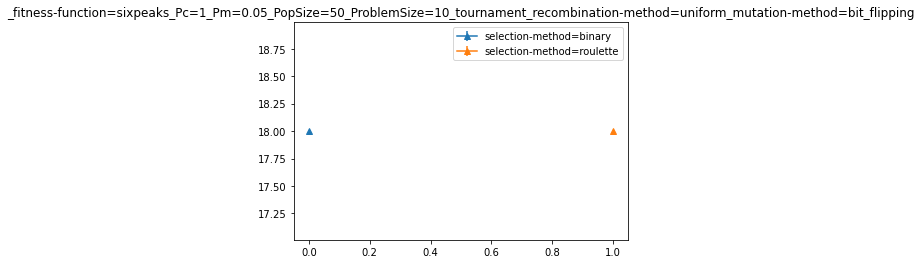

In [60]:
plot_results(table2_row_run['order_9'], fitness_function_name='sixpeaks')


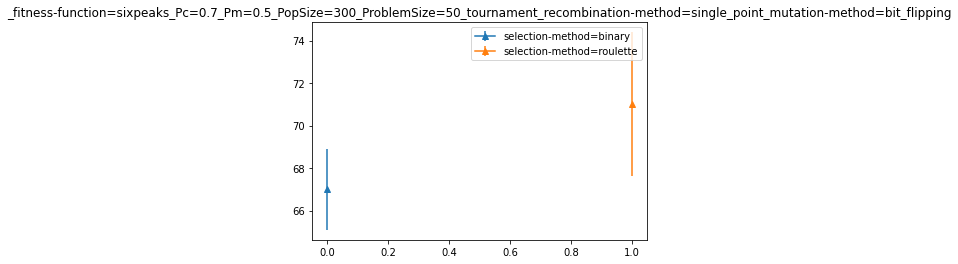

In [61]:
plot_results(table2_row_run['order_10'], fitness_function_name='sixpeaks')


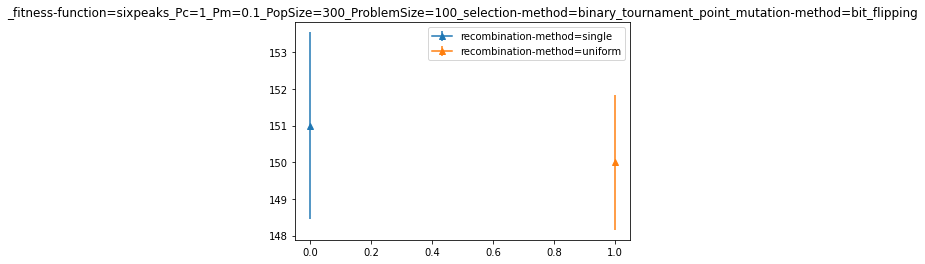

In [62]:
plot_results(table2_row_run['order_11'], fitness_function_name='sixpeaks')


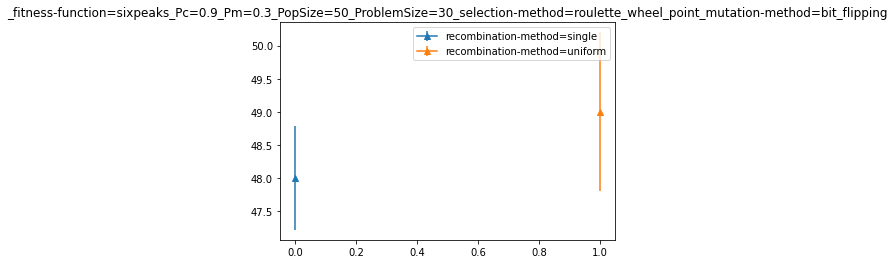

In [63]:
plot_results(table2_row_run['order_12'], fitness_function_name='sixpeaks')


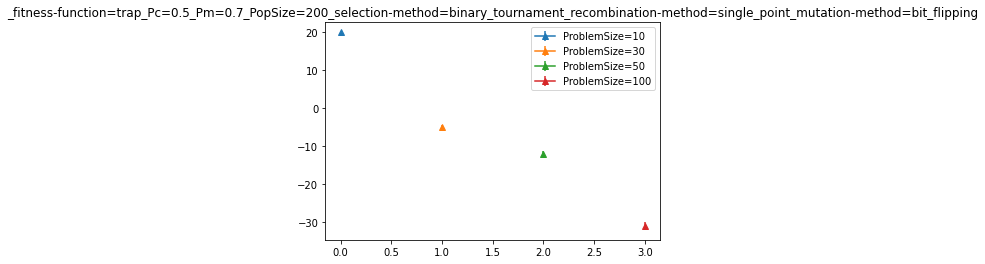

In [64]:
plot_results(table2_row_run['order_1'], fitness_function_name='trap')


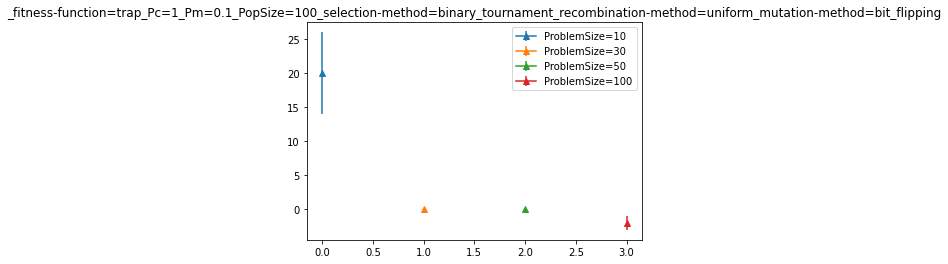

In [65]:
plot_results(table2_row_run['order_2'], fitness_function_name='trap')


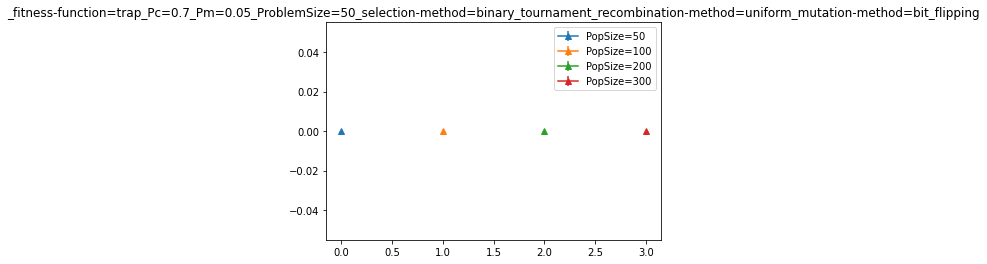

In [66]:
plot_results(table2_row_run['order_3'], fitness_function_name='trap')


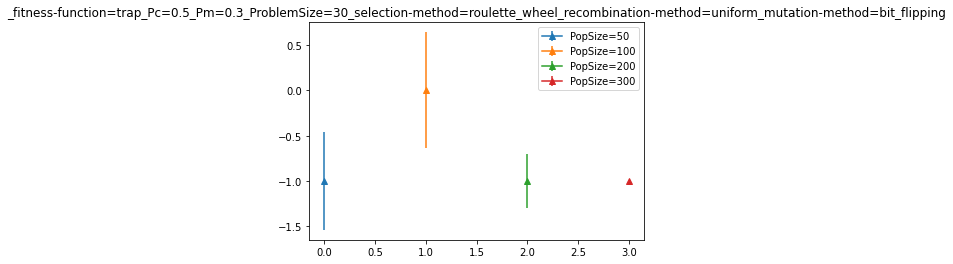

In [67]:
plot_results(table2_row_run['order_4'], fitness_function_name='trap')


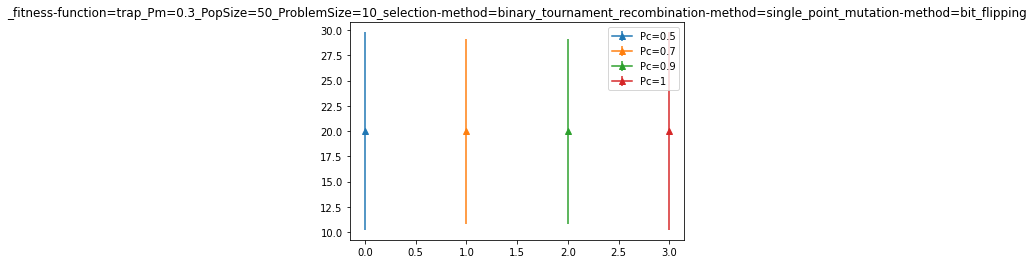

In [68]:
plot_results(table2_row_run['order_5'], fitness_function_name='trap')


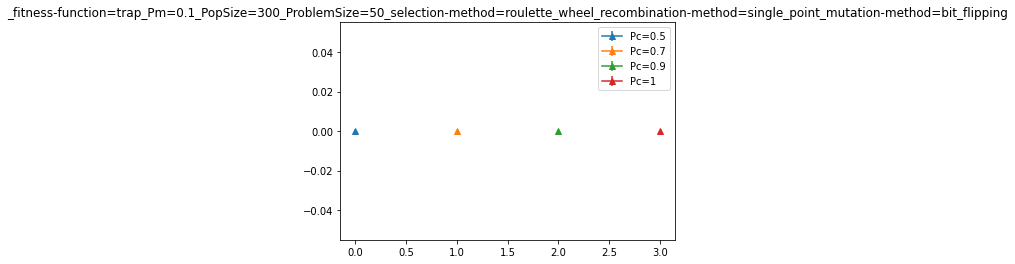

In [69]:
plot_results(table2_row_run['order_6'], fitness_function_name='trap')


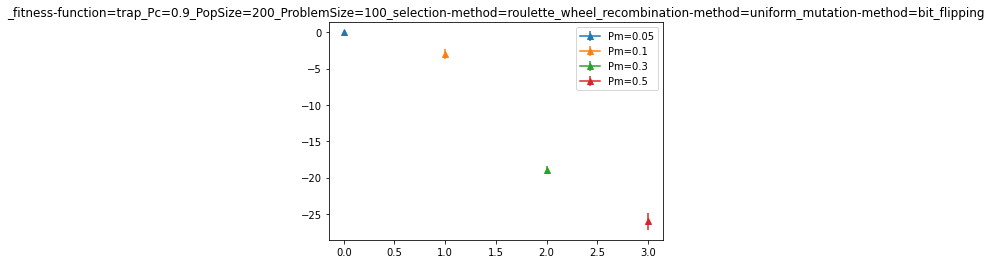

In [70]:
plot_results(table2_row_run['order_7'], fitness_function_name='trap')


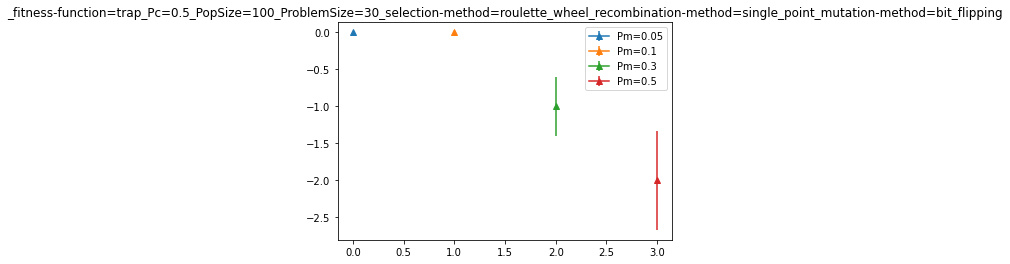

In [71]:
plot_results(table2_row_run['order_8'], fitness_function_name='trap')


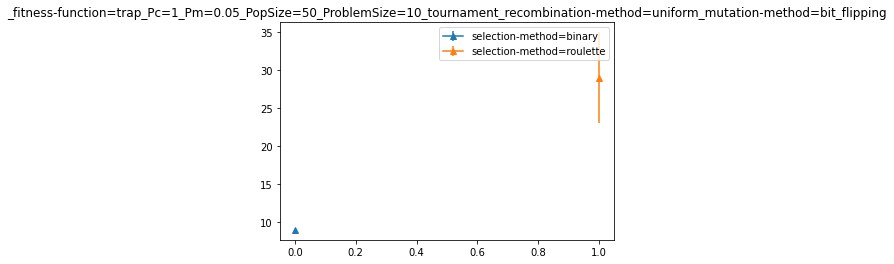

In [72]:
plot_results(table2_row_run['order_9'], fitness_function_name='trap')


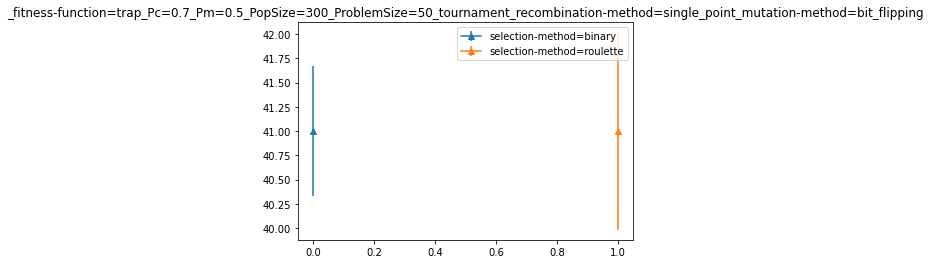

In [73]:
plot_results(table2_row_run['order_10'], fitness_function_name='trap')


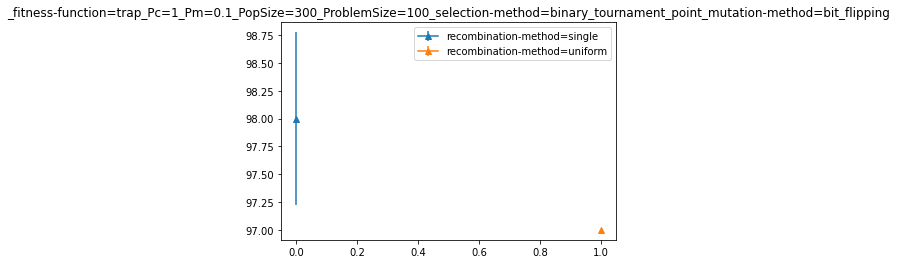

In [74]:
plot_results(table2_row_run['order_11'], fitness_function_name='trap')


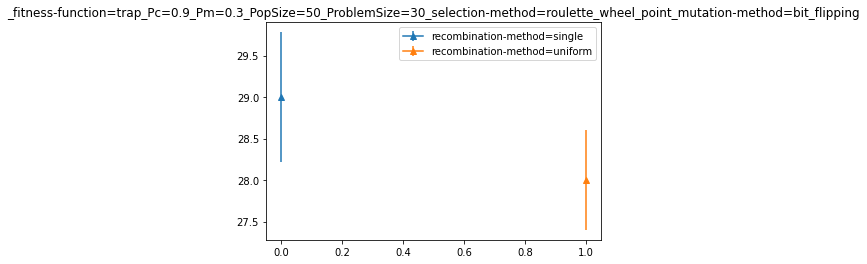

In [75]:
plot_results(table2_row_run['order_12'], fitness_function_name='trap')


## showing Q3 table run, results

In [76]:
table3_row_run = get_all_statistics(Q3_run_order_dict)

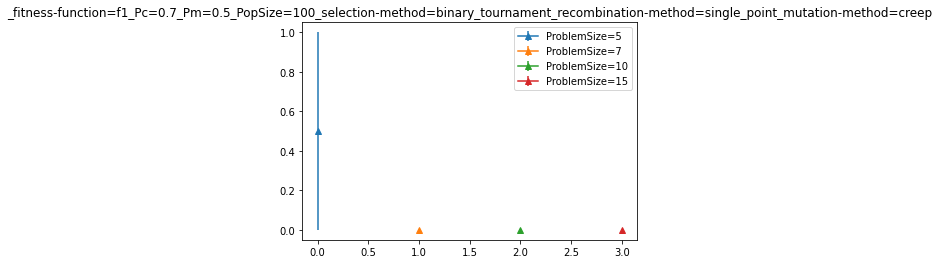

In [77]:
plot_results(table3_row_run['order_1'], fitness_function_name='f1', stats='mean')

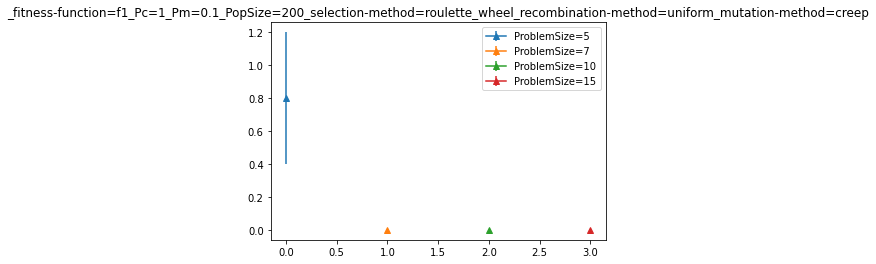

In [78]:
plot_results(table3_row_run['order_2'], fitness_function_name='f1', stats='mean')

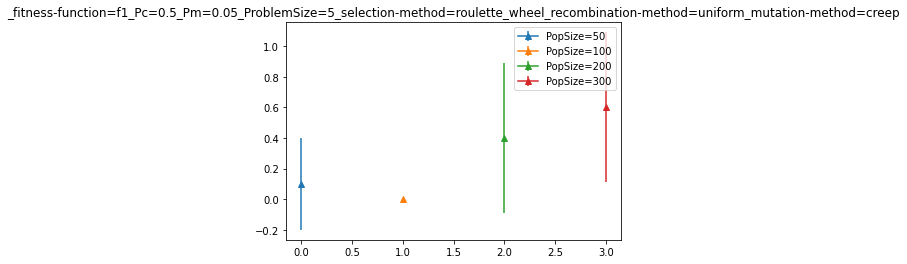

In [79]:
plot_results(table3_row_run['order_3'], fitness_function_name='f1', stats='mean')

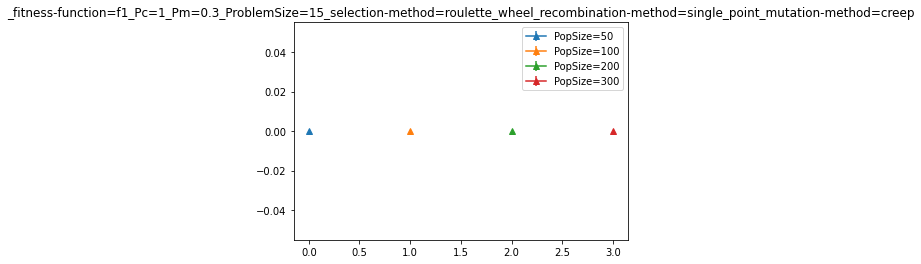

In [80]:
plot_results(table3_row_run['order_4'], fitness_function_name='f1', stats='mean')

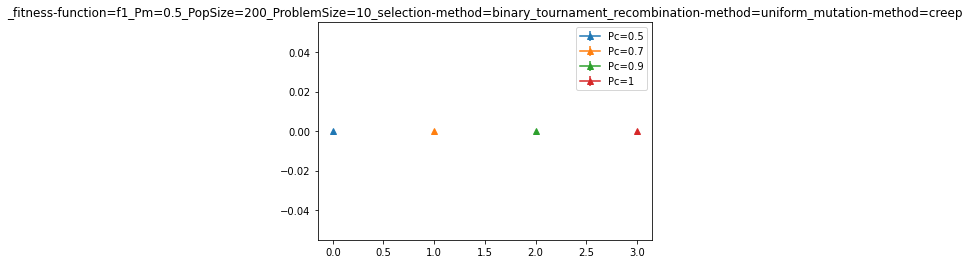

In [81]:
plot_results(table3_row_run['order_5'], fitness_function_name='f1', stats='mean')


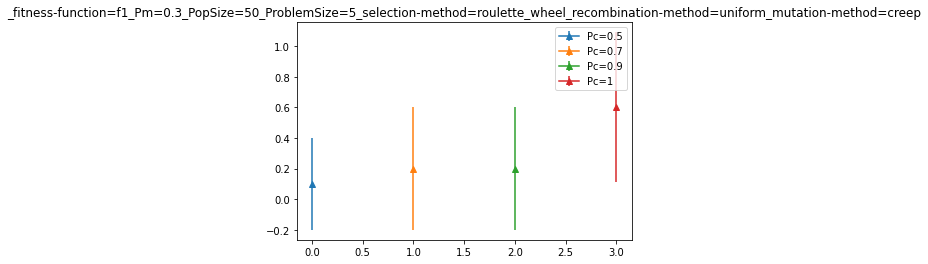

In [82]:
plot_results(table3_row_run['order_6'], fitness_function_name='f1', stats='mean')

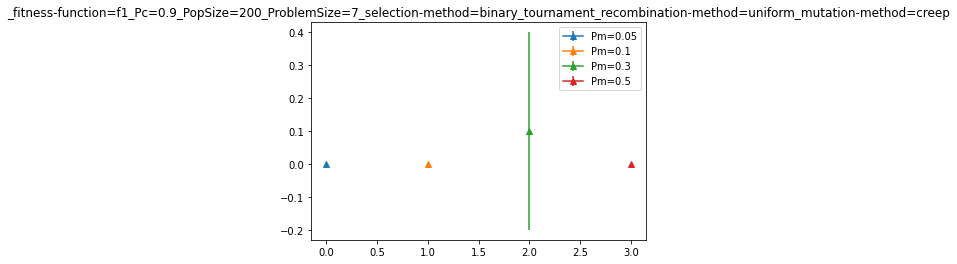

In [83]:
plot_results(table3_row_run['order_7'], fitness_function_name='f1', stats='mean')


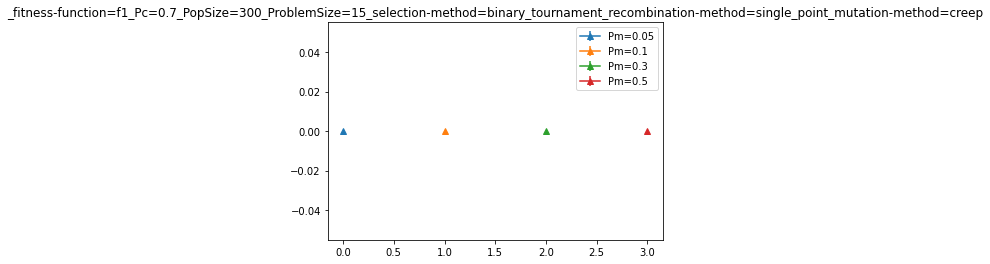

In [84]:
plot_results(table3_row_run['order_8'], fitness_function_name='f1', stats='mean')

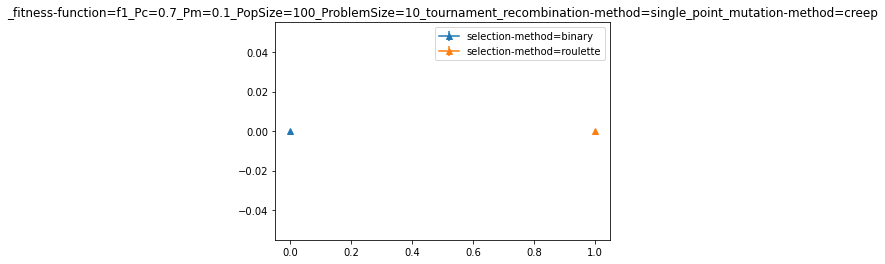

In [85]:
plot_results(table3_row_run['order_9'], fitness_function_name='f1', stats='mean')


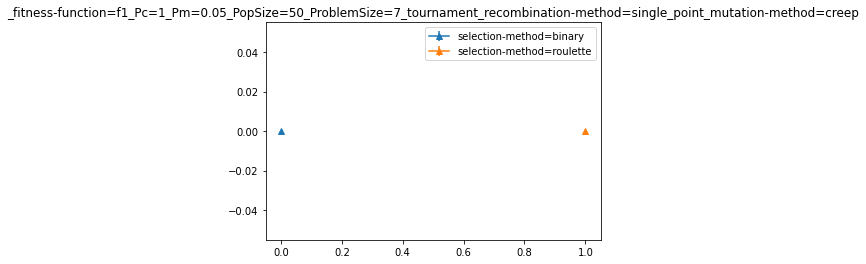

In [86]:
plot_results(table3_row_run['order_10'], fitness_function_name='f1', stats='mean')

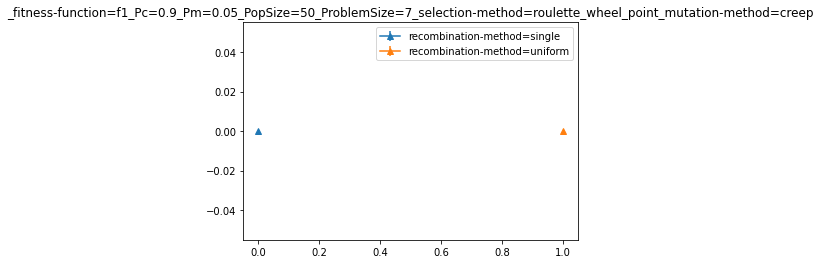

In [87]:
plot_results(table3_row_run['order_11'], fitness_function_name='f1', stats='mean')

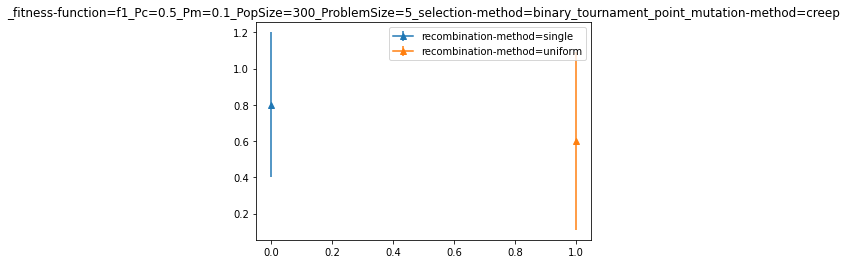

In [88]:
plot_results(table3_row_run['order_12'], fitness_function_name='f1', stats='mean')

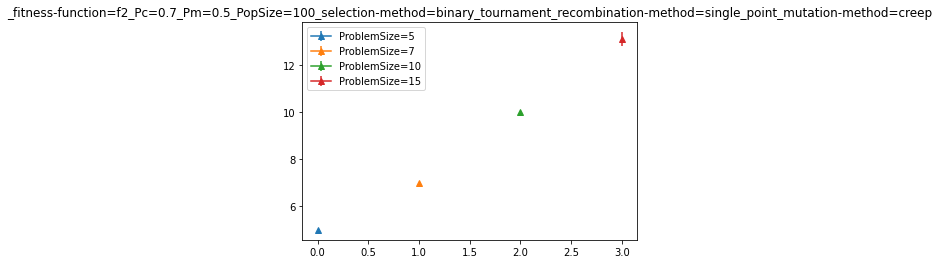

In [89]:
plot_results(table3_row_run['order_1'], fitness_function_name='f2', stats='mean')

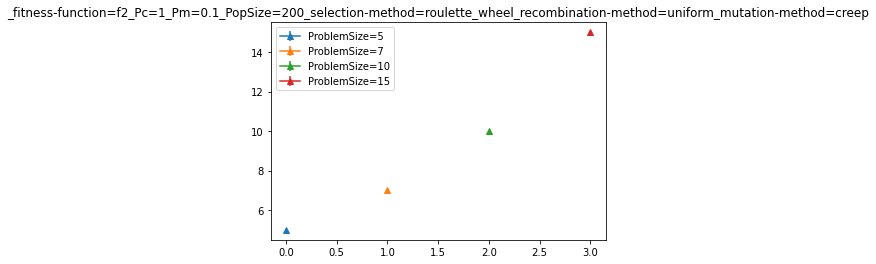

In [90]:
plot_results(table3_row_run['order_2'], fitness_function_name='f2', stats='mean')

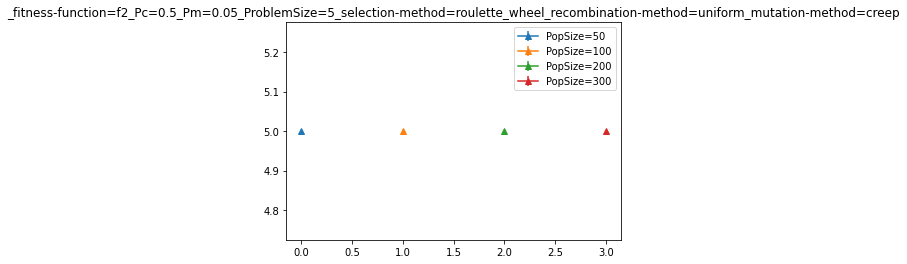

In [91]:
plot_results(table3_row_run['order_3'], fitness_function_name='f2', stats='mean')

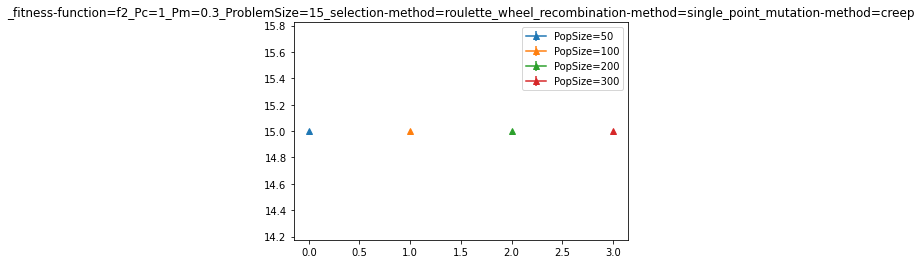

In [92]:
plot_results(table3_row_run['order_4'], fitness_function_name='f2', stats='mean')


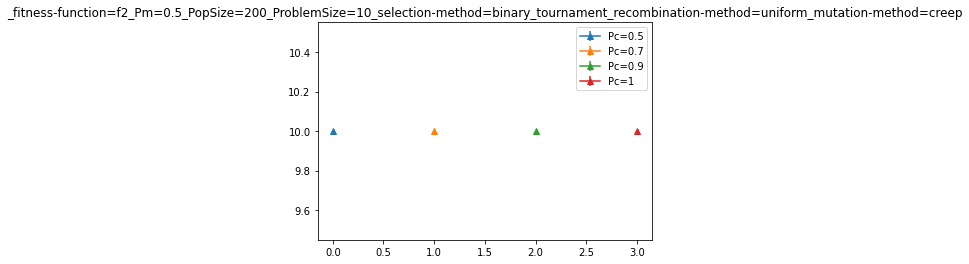

In [93]:
plot_results(table3_row_run['order_5'], fitness_function_name='f2', stats='mean')

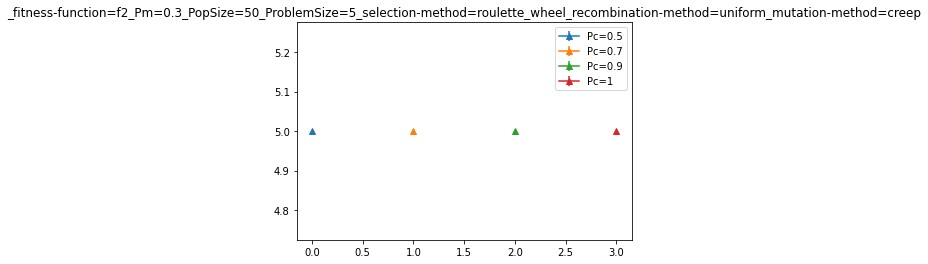

In [94]:
plot_results(table3_row_run['order_6'], fitness_function_name='f2', stats='mean')

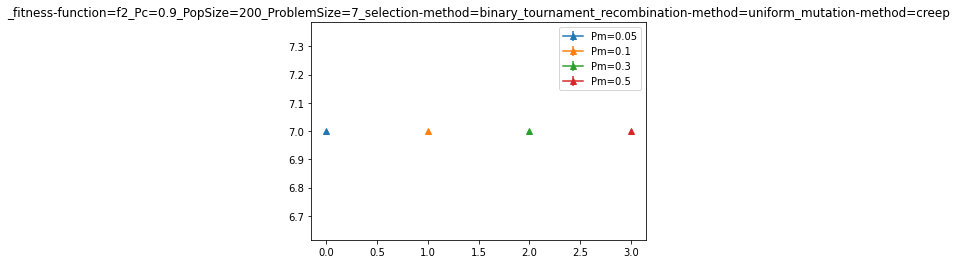

In [95]:
plot_results(table3_row_run['order_7'], fitness_function_name='f2', stats='mean')

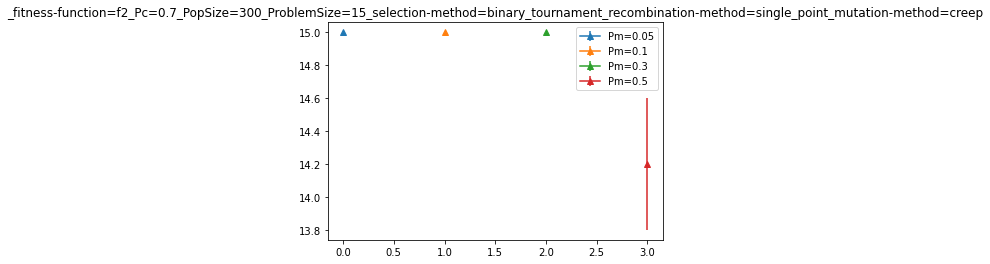

In [96]:
plot_results(table3_row_run['order_8'], fitness_function_name='f2', stats='mean')

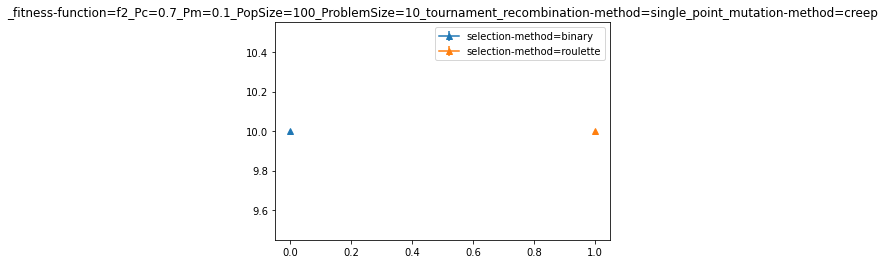

In [97]:
plot_results(table3_row_run['order_9'], fitness_function_name='f2', stats='mean')

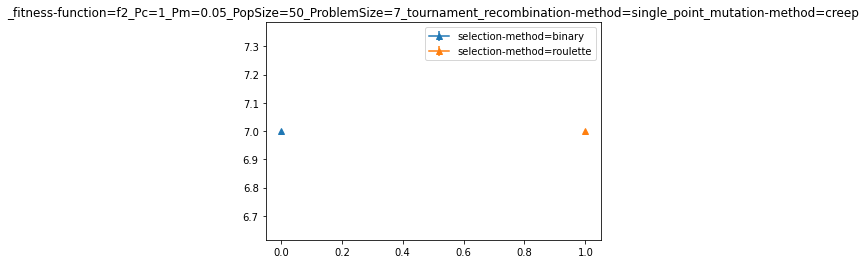

In [98]:
plot_results(table3_row_run['order_10'], fitness_function_name='f2', stats='mean')

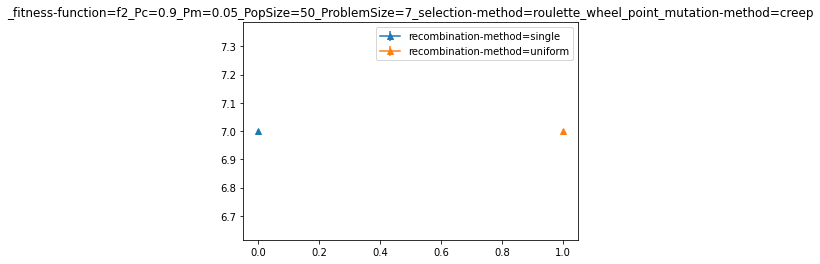

In [99]:
plot_results(table3_row_run['order_11'], fitness_function_name='f2', stats='mean')

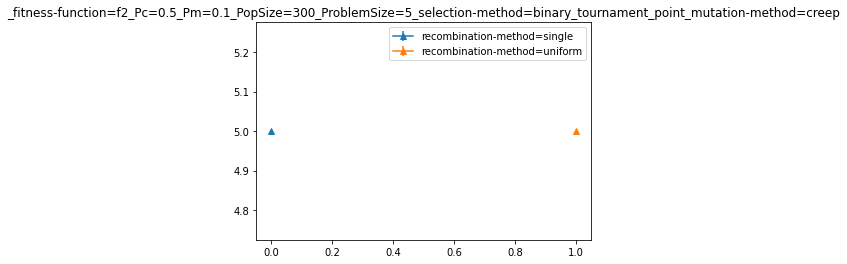

In [100]:
plot_results(table3_row_run['order_12'], fitness_function_name='f2', stats='mean')

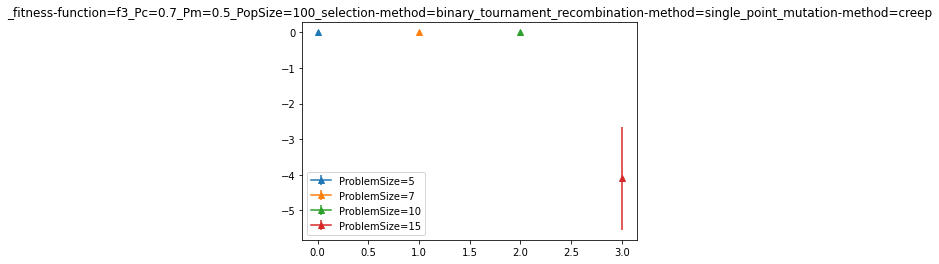

In [101]:
plot_results(table3_row_run['order_1'], fitness_function_name='f3', stats='mean')

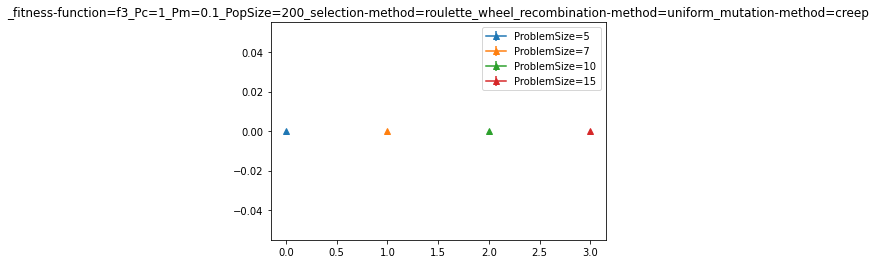

In [102]:
plot_results(table3_row_run['order_2'], fitness_function_name='f3', stats='mean')

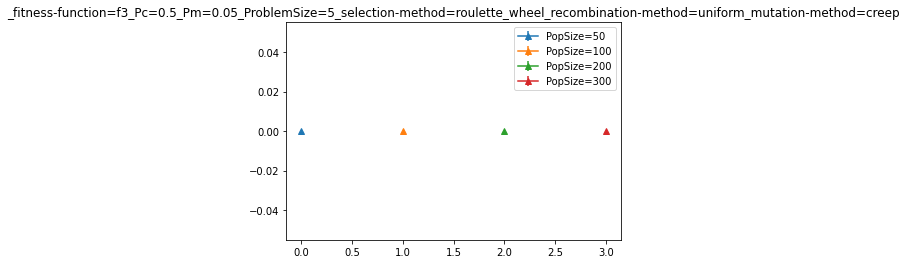

In [103]:
plot_results(table3_row_run['order_3'], fitness_function_name='f3', stats='mean')

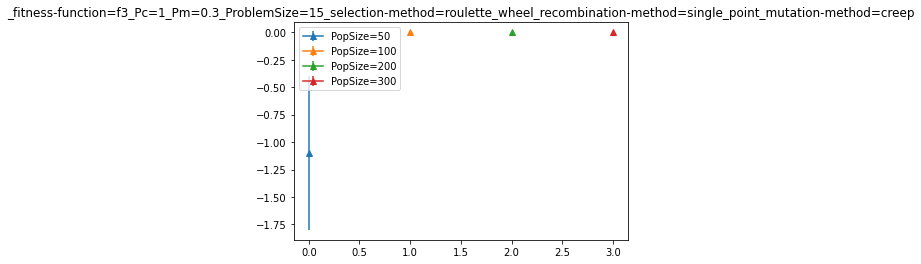

In [104]:
plot_results(table3_row_run['order_4'], fitness_function_name='f3', stats='mean')

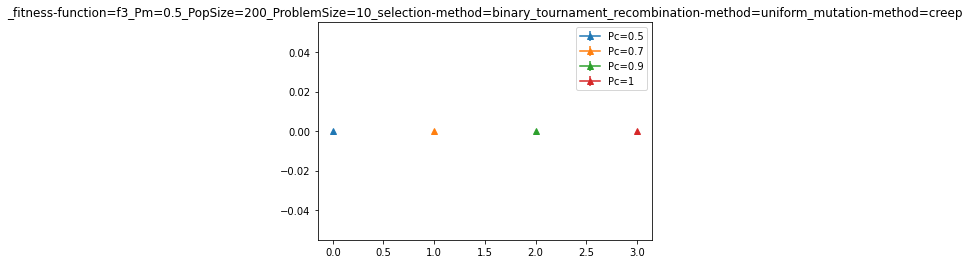

In [105]:
plot_results(table3_row_run['order_5'], fitness_function_name='f3', stats='mean')

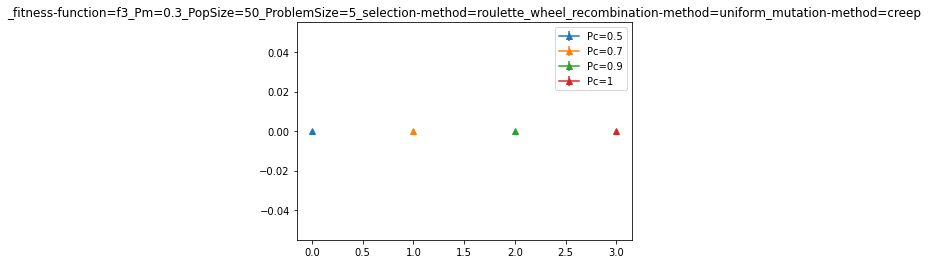

In [106]:
plot_results(table3_row_run['order_6'], fitness_function_name='f3', stats='mean')

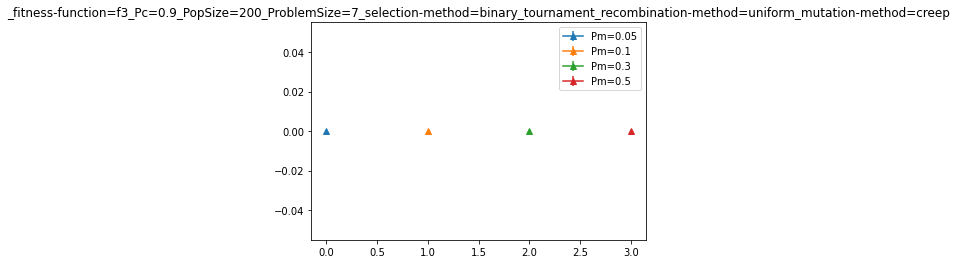

In [107]:
plot_results(table3_row_run['order_7'], fitness_function_name='f3', stats='mean')

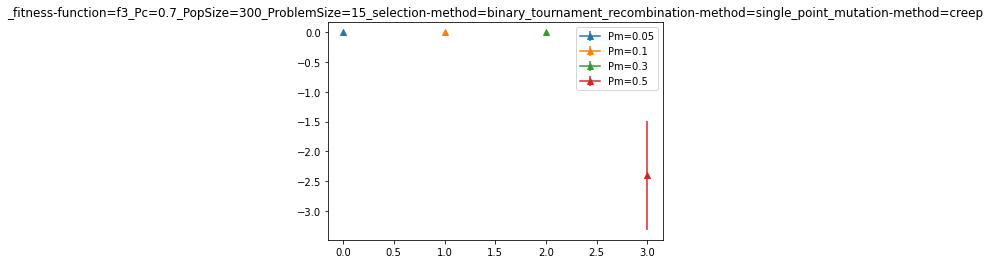

In [108]:
plot_results(table3_row_run['order_8'], fitness_function_name='f3', stats='mean')

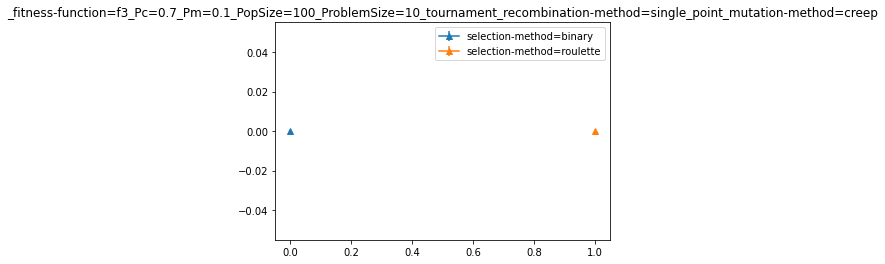

In [109]:
plot_results(table3_row_run['order_9'], fitness_function_name='f3', stats='mean')

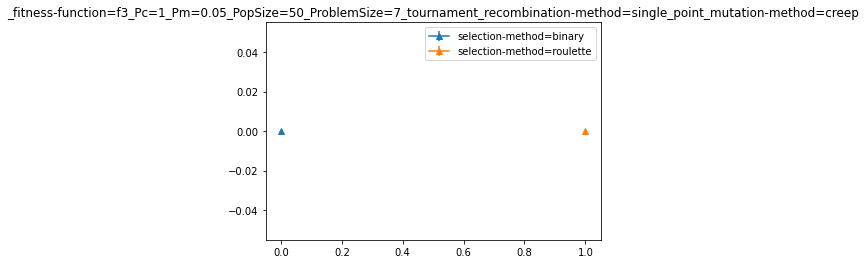

In [110]:
plot_results(table3_row_run['order_10'], fitness_function_name='f3', stats='mean')

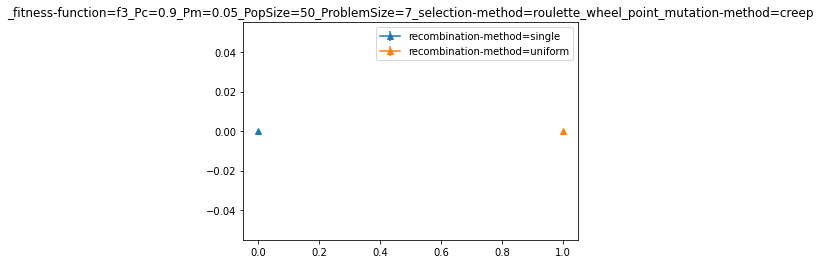

In [111]:
plot_results(table3_row_run['order_11'], fitness_function_name='f3', stats='mean')

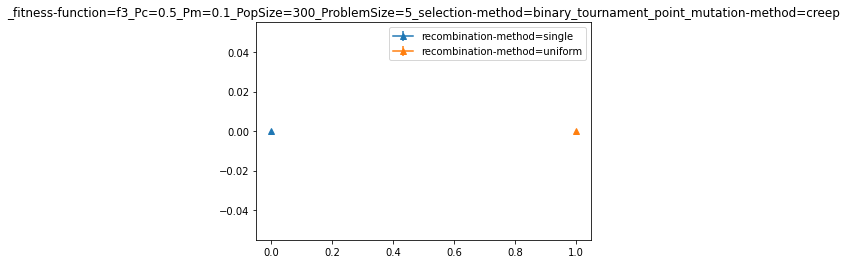

In [112]:
plot_results(table3_row_run['order_12'], fitness_function_name='f3', stats='mean')

## Question 3 in Green box
Analyse the `T` values for fourpeaks and sixpeaks functions with `problemSize=10`.

In [52]:
Q3_bounding_box = get_all_statistics(Q3_bounding_box_run_dict)

In [53]:
## indexes in the dictionary
four_peaks_idx = 0
six_peaks_idx = 1
T_values_idx = [0,1,2,3]

data_fourpeaks = []
data_sixpeaks = []
for T in T_values_idx:
    data_fourpeaks.append(list(list(Q3_bounding_box.values())[T].values())[four_peaks_idx])
    data_sixpeaks.append(list(list(Q3_bounding_box.values())[T].values())[six_peaks_idx]) 

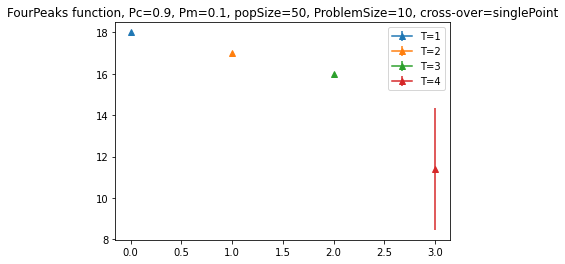

In [58]:
for idx, values in enumerate(data_fourpeaks):
    plt.errorbar(idx, values['mean'], values['std'], marker='^')
plt.legend(['T=1', 'T=2', 'T=3', 'T=4'])
plt.title('FourPeaks function, Pc=0.9, Pm=0.1, popSize=50, ProblemSize=10, cross-over=singlePoint')
plt.show()

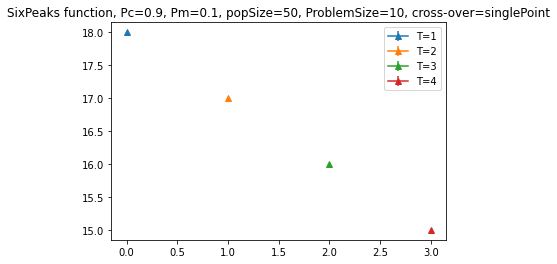

In [59]:
for idx, values in enumerate(data_sixpeaks):
    plt.errorbar(idx, values['mean'], values['std'], marker='^')
plt.legend(['T=1', 'T=2', 'T=3', 'T=4'])
plt.title('SixPeaks function, Pc=0.9, Pm=0.1, popSize=50, ProblemSize=10, cross-over=singlePoint')
plt.show()